# Installs and Imports

In [ ]:
!nvidia-smi

Mon Aug 25 10:21:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
!pip install -q datasets transformers evaluate
!pip install -q albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.4 MB/s eta 0:00:00


# Download Datasets

## Function: Download with progress bar

In [ ]:
import requests

# Function to download a file with a progress bar
def download_with_progress(url, output_path):
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    chunk_size = 1024  # Size of the chunks in bytes (1 KB)

    with open(output_path, 'wb') as file, tqdm(
        desc=f'Downloading {os.path.basename(output_path)}',
        total=total_size,
        unit='B',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(chunk_size=chunk_size):
            file.write(data)
            bar.update(len(data))

## ISIC2019

In [ ]:
import os
import zipfile
from tqdm.notebook import tqdm

# URLs for the 2019 dataset
images_url = 'https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip'
metadata_url = 'https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv'

# Define the folder structure
output_folder = 'Datasources/ISIC2019'
images_folder = os.path.join(output_folder, 'images')
metadata_csv_path = os.path.join(output_folder, 'ISIC_2019_Training_GroundTruth.csv')

# Check if images need to be downloaded
if not os.path.exists(images_folder):
    os.makedirs(images_folder)

    # Download images
    images_zip_path = os.path.join(output_folder, 'images.zip')
    download_with_progress(images_url, images_zip_path)
    print("Images successfully downloaded.")

    # Extract images
    with zipfile.ZipFile(images_zip_path, 'r') as z:
        z.extractall(images_folder)
        print("Images successfully extracted to:", images_folder)
    os.remove(images_zip_path)  # Delete ZIP file after extraction
else:
    print(f"The folder '{images_folder}' already exists. Image download skipped.")

# Check if metadata needs to be downloaded
if not os.path.exists(metadata_csv_path):
    # Download metadata
    download_with_progress(metadata_url, metadata_csv_path)
    print("Metadata successfully downloaded and saved under:", metadata_csv_path)
else:
    print("The metadata file already exists. Metadata download skipped.")

Images successfully downloaded.
Images successfully extracted to: Datasources/ISIC2019/images


Metadata successfully downloaded and saved under: Datasources/ISIC2019/ISIC_2019_Training_GroundTruth.csv


## PAD-UFES-20

In [ ]:
import shutil

output_folder = 'Datasources/PADUFES20'
data_url = 'https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/zr7vgbcyr2-1.zip'

if not os.path.exists(output_folder):
  os.makedirs(output_folder)

  # Download data
  images_zip_path = os.path.join(output_folder, 'images.zip')
  download_with_progress(data_url, images_zip_path)
  print("Images successfully downloaded.")

  # Extract data
  with zipfile.ZipFile(images_zip_path, 'r') as z:
      z.extractall(output_folder)
      print("Data successfully extracted to:", output_folder)
  os.remove(images_zip_path)  # Delete ZIP file after extraction

  zf = zipfile.ZipFile('/content/Datasources/PADUFES20/images/imgs_part_1.zip', 'r')
  zf.extractall('/content/Datasources/PADUFES20/images')
  print("Images 1 successfully extracted to:", '/content/Datasources/PADUFES20/images')
  os.remove('/content/Datasources/PADUFES20/images/imgs_part_1.zip')  # Delete ZIP file after extraction

  zf = zipfile.ZipFile('/content/Datasources/PADUFES20/images/imgs_part_2.zip', 'r')
  zf.extractall('/content/Datasources/PADUFES20/images')
  print("Images 2 successfully extracted to:", '/content/Datasources/PADUFES20/images')
  os.remove('/content/Datasources/PADUFES20/images/imgs_part_2.zip')  # Delete ZIP file after extraction

  zf = zipfile.ZipFile('/content/Datasources/PADUFES20/images/imgs_part_3.zip', 'r')
  zf.extractall('/content/Datasources/PADUFES20/images')
  print("Images 3 successfully extracted to:", '/content/Datasources/PADUFES20/images')
  os.remove('/content/Datasources/PADUFES20/images/imgs_part_3.zip')  # Delete ZIP file after extraction

  #Move files
  source = "/content/Datasources/PADUFES20/images/imgs_part_1"
  destination = "/content/Datasources/PADUFES20/images"
  files = os.listdir(source)
  for file in files:
    file_name = os.path.join(source, file)
    shutil.move(file_name, destination)
  print("Files 1 Moved")
  os.rmdir("/content/Datasources/PADUFES20/images/imgs_part_1")

  source = "/content/Datasources/PADUFES20/images/imgs_part_2"
  destination = "/content/Datasources/PADUFES20/images"
  files = os.listdir(source)
  for file in files:
    file_name = os.path.join(source, file)
    shutil.move(file_name, destination)
  print("Files 2 Moved")
  os.rmdir("/content/Datasources/PADUFES20/images/imgs_part_2")

  source = "/content/Datasources/PADUFES20/images/imgs_part_3"
  destination = "/content/Datasources/PADUFES20/images"
  files = os.listdir(source)
  for file in files:
    file_name = os.path.join(source, file)
    shutil.move(file_name, destination)
  print("Files 3 Moved")
  os.rmdir("/content/Datasources/PADUFES20/images/imgs_part_3")

Images successfully downloaded.
Data successfully extracted to: Datasources/PADUFES20
Images 1 successfully extracted to: /content/Datasources/PADUFES20/images
Images 2 successfully extracted to: /content/Datasources/PADUFES20/images
Images 3 successfully extracted to: /content/Datasources/PADUFES20/images
Files 1 Moved
Files 2 Moved
Files 3 Moved


## Analyze Datasources

In [ ]:
import pandas as pd

# Load CSV and map labels
csv_path = '/content/Datasources/ISIC2019/ISIC_2019_Training_GroundTruth.csv'
images_folder = '/content/Datasources/ISIC2019/images/ISIC_2019_Training_Input'
ISIC2019_df = pd.read_csv(csv_path)

label_mapping = {
    'MEL': 'MEL',
    'NV': 'NEV',
    'BCC': 'BCC',
    'AK': 'ACK',
    'BKL': 'BKL',
    'DF': 'DF',
    'VASC': 'VASC',
    'SCC': 'SCC',
    'UNK': 'UNK'
}

# Map labels to single label column
ISIC2019_df['label'] = ISIC2019_df[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']].idxmax(axis=1).map(label_mapping)

# Create image paths
ISIC2019_df['image_path'] = ISIC2019_df['image'].apply(lambda x: os.path.join(images_folder, f"{x}.jpg"))
#ISIC2019_df['image_id'] = ISIC2019_df['image']

# Filter necessary columns
ISIC2019_df = ISIC2019_df[['image_path', 'label']]

# Display class distribution (absolute and relative)
class_distribution = ISIC2019_df['label'].value_counts()
class_distribution_relative = ISIC2019_df['label'].value_counts(normalize=True) * 100

print(f"{len(ISIC2019_df)} images")
print("\nClass Distribution (absolute):")
print(class_distribution)
print("\nClass Distribution (relative %):")
print(class_distribution_relative)

ISIC2019_df

25331 images

Class Distribution (absolute):
label
NEV     12875
MEL      4522
BCC      3323
BKL      2624
ACK       867
SCC       628
VASC      253
DF        239
Name: count, dtype: int64

Class Distribution (relative %):
label
NEV     50.827050
MEL     17.851644
BCC     13.118314
BKL     10.358849
ACK      3.422684
SCC      2.479176
VASC     0.998776
DF       0.943508
Name: proportion, dtype: float64


image_path label
0      /content/Datasources/ISIC2019/images/ISIC_2019...   NEV
1      /content/Datasources/ISIC2019/images/ISIC_2019...   NEV
2      /content/Datasources/ISIC2019/images/ISIC_2019...   MEL
3      /content/Datasources/ISIC2019/images/ISIC_2019...   NEV
4      /content/Datasources/ISIC2019/images/ISIC_2019...   MEL
...                                                  ...   ...
25326  /content/Datasources/ISIC2019/images/ISIC_2019...   BCC
25327  /content/Datasources/ISIC2019/images/ISIC_2019...   BKL
25328  /content/Datasources/ISIC2019/images/ISIC_2019...   MEL
25329  /content/Datasources/ISIC2019/images/ISIC_2019...   NEV
25330  /content/Datasources/ISIC2019/images/ISIC_2019...   BKL

[25331 rows x 2 columns]

In [ ]:
# Load CSV and map labels
csv_path = '/content/Datasources/PADUFES20/metadata.csv'
images_folder = '/content/Datasources/PADUFES20/images'
PADUFES20_df = pd.read_csv(csv_path)

# Map labels to single label column
PADUFES20_df['label'] = PADUFES20_df['diagnostic']

# Create image paths
#PADUFES20_df['image_id'] = PADUFES20_df['img_id']
PADUFES20_df['image_path'] = PADUFES20_df['img_id'].apply(lambda x: os.path.join(images_folder, f"{x}"))


# Filter necessary columns
PADUFES20_df = PADUFES20_df[['image_path', 'label']]

# Display class distribution (absolute and relative)
class_distribution = PADUFES20_df['label'].value_counts()
class_distribution_relative = PADUFES20_df['label'].value_counts(normalize=True) * 100

print(f"{len(PADUFES20_df)} images")
print("\nClass Distribution (absolute):")
print(class_distribution)
print("\nClass Distribution (relative %):")
print(class_distribution_relative)

PADUFES20_df

2298 images

Class Distribution (absolute):
label
BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: count, dtype: int64

Class Distribution (relative %):
label
BCC    36.771105
ACK    31.766754
NEV    10.617929
SEK    10.226284
SCC     8.355091
MEL     2.262837
Name: proportion, dtype: float64


image_path label
0     /content/Datasources/PADUFES20/images/PAT_1516...   NEV
1     /content/Datasources/PADUFES20/images/PAT_46_8...   BCC
2     /content/Datasources/PADUFES20/images/PAT_1545...   ACK
3     /content/Datasources/PADUFES20/images/PAT_1989...   ACK
4     /content/Datasources/PADUFES20/images/PAT_684_...   BCC
...                                                 ...   ...
2293  /content/Datasources/PADUFES20/images/PAT_1708...   ACK
2294  /content/Datasources/PADUFES20/images/PAT_46_8...   BCC
2295  /content/Datasources/PADUFES20/images/PAT_1343...   SEK
2296  /content/Datasources/PADUFES20/images/PAT_326_...   BCC
2297  /content/Datasources/PADUFES20/images/PAT_1714...   SEK

[2298 rows x 2 columns]

# Create Custom Dataframes

In [ ]:
import numpy as np

#Dermoscopic
#BCC Dermoscopic
remove_n = 2478
bcc_df_dermoscopic = ISIC2019_df[ISIC2019_df['label'] == 'BCC']
drop_indices = np.random.choice(bcc_df_dermoscopic.index, remove_n, replace=False)
bcc_df = bcc_df_dermoscopic.drop(drop_indices)

df_train_dermoscopic_bcc = bcc_df.sample(frac=0.8,random_state=200)
df_test_dermoscopic_bcc = bcc_df.drop(df_train_dermoscopic_bcc.index)

#SCC Dermoscopic
remove_n = 436
scc_df_dermoscopic = ISIC2019_df[ISIC2019_df['label'] == 'SCC']
drop_indices = np.random.choice(scc_df_dermoscopic.index, remove_n, replace=False)
scc_df = scc_df_dermoscopic.drop(drop_indices)

df_train_dermoscopic_scc = scc_df.sample(frac=0.8,random_state=200)
df_test_dermoscopic_scc = scc_df.drop(df_train_dermoscopic_scc.index)

df_train_dermoscopic = pd.concat([df_train_dermoscopic_bcc, df_train_dermoscopic_scc], ignore_index=True)
df_train_dermoscopic = df_train_dermoscopic.sample(frac=1, random_state=42).reset_index(drop=True)

df_test_dermoscopic = pd.concat([df_test_dermoscopic_bcc, df_test_dermoscopic_scc], ignore_index=True)
df_test_dermoscopic = df_test_dermoscopic.sample(frac=1, random_state=42).reset_index(drop=True)

#Clinical
#BCC Clinical
bcc_df_clinical = PADUFES20_df[PADUFES20_df['label'] == 'BCC']

df_train_clinical_bcc = bcc_df_clinical.sample(frac=0.8,random_state=200)
df_test_clinical_bcc = bcc_df_clinical.drop(df_train_clinical_bcc.index)

#SCC Clinical
scc_df_clinical = PADUFES20_df[PADUFES20_df['label'] == 'SCC']

df_train_clinical_scc = scc_df_clinical.sample(frac=0.8,random_state=200)
df_test_clinical_scc = scc_df_clinical.drop(df_train_clinical_scc.index)

df_train_clinical = pd.concat([df_train_clinical_bcc, df_train_clinical_scc], ignore_index=True)
df_train_clinical = df_train_clinical.sample(frac=1, random_state=42).reset_index(drop=True)

df_test_clinical = pd.concat([df_test_clinical_bcc, df_test_clinical_scc], ignore_index=True)
df_test_clinical = df_test_clinical.sample(frac=1, random_state=42).reset_index(drop=True)

#Mixed - Train
#BCC Mixed
remove_n = 338
bcc_df_mixed_1 = df_train_dermoscopic_bcc
drop_indices = np.random.choice(df_train_dermoscopic_bcc.index, remove_n, replace=False)
bcc_df_mixed_1 = bcc_df_mixed_1.drop(drop_indices)

bcc_df_mixed_2 = df_train_clinical_bcc
drop_indices = np.random.choice(df_train_clinical_bcc.index, remove_n, replace=False)
bcc_df_mixed_2 = bcc_df_mixed_2.drop(drop_indices)

df_train_mixed_bcc = pd.concat([bcc_df_mixed_1, bcc_df_mixed_2], ignore_index=True)
df_train_mixed_bcc = df_train_mixed_bcc.sample(frac=1, random_state=42).reset_index(drop=True)

#SCC Mixed
remove_n = 77
scc_df_mixed_1 = df_train_dermoscopic_scc
drop_indices = np.random.choice(df_train_dermoscopic_scc.index, remove_n, replace=False)
scc_df_mixed_1 = scc_df_mixed_1.drop(drop_indices)

scc_df_mixed_2 = df_train_clinical_scc
drop_indices = np.random.choice(df_train_clinical_scc.index, remove_n, replace=False)
scc_df_mixed_2 = scc_df_mixed_2.drop(drop_indices)

df_train_mixed_scc = pd.concat([scc_df_mixed_1, scc_df_mixed_2], ignore_index=True)
df_train_mixed_scc = df_train_mixed_scc.sample(frac=1, random_state=42).reset_index(drop=True)

df_train_mixed = pd.concat([df_train_mixed_bcc, df_train_mixed_scc], ignore_index=True)
df_train_mixed = df_train_mixed.sample(frac=1, random_state=42).reset_index(drop=True)

#Mixed - Test
#BCC Mixed
remove_n = 84
bcc_df_mixed_1_test = df_test_dermoscopic_bcc
drop_indices = np.random.choice(df_test_dermoscopic_bcc.index, remove_n, replace=False)
bcc_df_mixed_1_test = bcc_df_mixed_1_test.drop(drop_indices)

remove_n = 85
bcc_df_mixed_2_test = df_test_clinical_bcc
drop_indices = np.random.choice(df_test_clinical_bcc.index, remove_n, replace=False)
bcc_df_mixed_2_test = bcc_df_mixed_2_test.drop(drop_indices)

df_test_mixed_bcc = pd.concat([bcc_df_mixed_1_test, bcc_df_mixed_2_test], ignore_index=True)
df_test_mixed_bcc = df_test_mixed_bcc.sample(frac=1, random_state=42).reset_index(drop=True)

#SCC Mixed
remove_n = 19
scc_df_mixed_1_test = df_test_dermoscopic_scc
drop_indices = np.random.choice(df_test_dermoscopic_scc.index, remove_n, replace=False)
scc_df_mixed_1_test = scc_df_mixed_1_test.drop(drop_indices)

scc_df_mixed_2_test = df_test_clinical_scc
drop_indices = np.random.choice(df_test_clinical_scc.index, remove_n, replace=False)
scc_df_mixed_2_test = scc_df_mixed_2_test.drop(drop_indices)

df_test_mixed_scc = pd.concat([scc_df_mixed_1_test, scc_df_mixed_2_test], ignore_index=True)
df_test_mixed_scc = df_test_mixed_scc.sample(frac=1, random_state=42).reset_index(drop=True)

df_test_mixed = pd.concat([df_test_mixed_bcc, df_test_mixed_scc], ignore_index=True)
df_test_mixed = df_test_mixed.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
"""
import numpy as np

#Dermoscopic
#BCC Dermoscopic
remove_n = 2478
bcc_df_dermoscopic = ISIC2019_df[ISIC2019_df['label'] == 'BCC']
drop_indices = np.random.choice(bcc_df_dermoscopic.index, remove_n, replace=False)
bcc_df = bcc_df_dermoscopic.drop(drop_indices)

df_train_dermoscopic_bcc = bcc_df.sample(frac=0.8,random_state=200)
df_test_dermoscopic_bcc = bcc_df.drop(df_train_dermoscopic_bcc.index)

#SCC Dermoscopic
remove_n = 137
scc_df_dermoscopic = ISIC2019_df[ISIC2019_df['label'] == 'ACK']
drop_indices = np.random.choice(scc_df_dermoscopic.index, remove_n, replace=False)
scc_df = scc_df_dermoscopic.drop(drop_indices)

df_train_dermoscopic_scc = scc_df.sample(frac=0.8,random_state=200)
df_test_dermoscopic_scc = scc_df.drop(df_train_dermoscopic_scc.index)

df_train_dermoscopic = pd.concat([df_train_dermoscopic_bcc, df_train_dermoscopic_scc], ignore_index=True)
df_train_dermoscopic = df_train_dermoscopic.sample(frac=1, random_state=42).reset_index(drop=True)

df_test_dermoscopic = pd.concat([df_test_dermoscopic_bcc, df_test_dermoscopic_scc], ignore_index=True)
df_test_dermoscopic = df_test_dermoscopic.sample(frac=1, random_state=42).reset_index(drop=True)

#Clinical
#BCC Clinical
bcc_df_clinical = PADUFES20_df[PADUFES20_df['label'] == 'BCC']

df_train_clinical_bcc = bcc_df_clinical.sample(frac=0.8,random_state=200)
df_test_clinical_bcc = bcc_df_clinical.drop(df_train_clinical_bcc.index)

#SCC Clinical
scc_df_clinical = PADUFES20_df[PADUFES20_df['label'] == 'ACK']

df_train_clinical_scc = scc_df_clinical.sample(frac=0.8,random_state=200)
df_test_clinical_scc = scc_df_clinical.drop(df_train_clinical_scc.index)

df_train_clinical = pd.concat([df_train_clinical_bcc, df_train_clinical_scc], ignore_index=True)
df_train_clinical = df_train_clinical.sample(frac=1, random_state=42).reset_index(drop=True)

df_test_clinical = pd.concat([df_test_clinical_bcc, df_test_clinical_scc], ignore_index=True)
df_test_clinical = df_test_clinical.sample(frac=1, random_state=42).reset_index(drop=True)

#Mixed - Train
#BCC Mixed
remove_n = 338
bcc_df_mixed_1 = df_train_dermoscopic_bcc
drop_indices = np.random.choice(df_train_dermoscopic_bcc.index, remove_n, replace=False)
bcc_df_mixed_1 = bcc_df_mixed_1.drop(drop_indices)

bcc_df_mixed_2 = df_train_clinical_bcc
drop_indices = np.random.choice(df_train_clinical_bcc.index, remove_n, replace=False)
bcc_df_mixed_2 = bcc_df_mixed_2.drop(drop_indices)

df_train_mixed_bcc = pd.concat([bcc_df_mixed_1, bcc_df_mixed_2], ignore_index=True)
df_train_mixed_bcc = df_train_mixed_bcc.sample(frac=1, random_state=42).reset_index(drop=True)

#SCC Mixed
remove_n = 292
scc_df_mixed_1 = df_train_dermoscopic_scc
drop_indices = np.random.choice(df_train_dermoscopic_scc.index, remove_n, replace=False)
scc_df_mixed_1 = scc_df_mixed_1.drop(drop_indices)

scc_df_mixed_2 = df_train_clinical_scc
drop_indices = np.random.choice(df_train_clinical_scc.index, remove_n, replace=False)
scc_df_mixed_2 = scc_df_mixed_2.drop(drop_indices)

df_train_mixed_scc = pd.concat([scc_df_mixed_1, scc_df_mixed_2], ignore_index=True)
df_train_mixed_scc = df_train_mixed_scc.sample(frac=1, random_state=42).reset_index(drop=True)

df_train_mixed = pd.concat([df_train_mixed_bcc, df_train_mixed_scc], ignore_index=True)
df_train_mixed = df_train_mixed.sample(frac=1, random_state=42).reset_index(drop=True)

#Mixed - Test
#BCC Mixed
remove_n = 84
bcc_df_mixed_1_test = df_test_dermoscopic_bcc
drop_indices = np.random.choice(df_test_dermoscopic_bcc.index, remove_n, replace=False)
bcc_df_mixed_1_test = bcc_df_mixed_1_test.drop(drop_indices)

remove_n = 85
bcc_df_mixed_2_test = df_test_clinical_bcc
drop_indices = np.random.choice(df_test_clinical_bcc.index, remove_n, replace=False)
bcc_df_mixed_2_test = bcc_df_mixed_2_test.drop(drop_indices)

df_test_mixed_bcc = pd.concat([bcc_df_mixed_1_test, bcc_df_mixed_2_test], ignore_index=True)
df_test_mixed_bcc = df_test_mixed_bcc.sample(frac=1, random_state=42).reset_index(drop=True)

#SCC Mixed
remove_n = 73
scc_df_mixed_1_test = df_test_dermoscopic_scc
drop_indices = np.random.choice(df_test_dermoscopic_scc.index, remove_n, replace=False)
scc_df_mixed_1_test = scc_df_mixed_1_test.drop(drop_indices)

scc_df_mixed_2_test = df_test_clinical_scc
drop_indices = np.random.choice(df_test_clinical_scc.index, remove_n, replace=False)
scc_df_mixed_2_test = scc_df_mixed_2_test.drop(drop_indices)

df_test_mixed_scc = pd.concat([scc_df_mixed_1_test, scc_df_mixed_2_test], ignore_index=True)
df_test_mixed_scc = df_test_mixed_scc.sample(frac=1, random_state=42).reset_index(drop=True)

df_test_mixed = pd.concat([df_test_mixed_bcc, df_test_mixed_scc], ignore_index=True)
df_test_mixed = df_test_mixed.sample(frac=1, random_state=42).reset_index(drop=True)

"""

"\nimport numpy as np\n\n#Dermoscopic\n#BCC Dermoscopic\nremove_n = 2478\nbcc_df_dermoscopic = ISIC2019_df[ISIC2019_df['label'] == 'BCC']\ndrop_indices = np.random.choice(bcc_df_dermoscopic.index, remove_n, replace=False)\nbcc_df = bcc_df_dermoscopic.drop(drop_indices)\n\ndf_train_dermoscopic_bcc = bcc_df.sample(frac=0.8,random_state=200)\ndf_test_dermoscopic_bcc = bcc_df.drop(df_train_dermoscopic_bcc.index)\n\n#SCC Dermoscopic\nremove_n = 137\nscc_df_dermoscopic = ISIC2019_df[ISIC2019_df['label'] == 'ACK']\ndrop_indices = np.random.choice(scc_df_dermoscopic.index, remove_n, replace=False)\nscc_df = scc_df_dermoscopic.drop(drop_indices)\n\ndf_train_dermoscopic_scc = scc_df.sample(frac=0.8,random_state=200)\ndf_test_dermoscopic_scc = scc_df.drop(df_train_dermoscopic_scc.index)\n\ndf_train_dermoscopic = pd.concat([df_train_dermoscopic_bcc, df_train_dermoscopic_scc], ignore_index=True)\ndf_train_dermoscopic = df_train_dermoscopic.sample(frac=1, random_state=42).reset_index(drop=True)\n\nd

In [ ]:
#Dataframe Dermoscopic Train Set
print("Dermoscopic Train Set ")
print(f"Dataset Größe: {len(df_train_dermoscopic)}")
print(df_train_dermoscopic['label'].value_counts())
#Dataframe Dermoscopic Test Set
print("Dermoscopic Test Set ")
print(f"Dataset Größe: {len(df_test_dermoscopic)}")
print(df_test_dermoscopic['label'].value_counts())
#Dataframe Clinical Train Set
print("Clinical Train Set ")
print(f"Dataset Größe: {len(df_train_clinical)}")
print(df_train_clinical['label'].value_counts())
#Dataframe Clinical Test Set
print("Clinical Test Set ")
print(f"Dataset Größe: {len(df_test_clinical)}")
print(df_test_clinical['label'].value_counts())
#Dataframe Mixed Train Set
print("Mixed Train Set ")
print(f"Dataset Größe: {len(df_train_mixed)}")
print(df_train_mixed['label'].value_counts())
#Dataframe Mixed Test Set
print("Mixed Test Set ")
print(f"Dataset Größe: {len(df_test_mixed)}")
print(df_test_mixed['label'].value_counts())

Dermoscopic Train Set 
Dataset Größe: 830
label
BCC    676
SCC    154
Name: count, dtype: int64
Dermoscopic Test Set 
Dataset Größe: 207
label
BCC    169
SCC     38
Name: count, dtype: int64
Clinical Train Set 
Dataset Größe: 830
label
BCC    676
SCC    154
Name: count, dtype: int64
Clinical Test Set 
Dataset Größe: 207
label
BCC    169
SCC     38
Name: count, dtype: int64
Mixed Train Set 
Dataset Größe: 830
label
BCC    676
SCC    154
Name: count, dtype: int64
Mixed Test Set 
Dataset Größe: 207
label
BCC    169
SCC     38
Name: count, dtype: int64


In [ ]:
from datasets import Dataset
from PIL import Image
from datasets import Features, ClassLabel, Image as ImageFeature

#Training Sets - Will be later split into train and val set
df_dermoscopic = df_train_dermoscopic.copy()
df_dermoscopic = df_dermoscopic.rename(columns={'image_path': 'image'})
df_dermoscopic['label'] = df_dermoscopic['label'].apply(lambda x: 1 if x == 'BCC' else 0)

df_clinical = df_train_clinical.copy()
df_clinical = df_clinical.rename(columns={'image_path': 'image'})
df_clinical['label'] = df_clinical['label'].apply(lambda x: 1 if x == 'BCC' else 0)

df_mixed = df_train_mixed.copy()
df_mixed = df_mixed.rename(columns={'image_path': 'image'})
df_mixed['label'] = df_mixed['label'].apply(lambda x: 1 if x == 'BCC' else 0)

#Test Sets
df_dermoscopic_test = df_test_dermoscopic.copy()
df_dermoscopic_test = df_dermoscopic_test.rename(columns={'image_path': 'image'})
df_dermoscopic_test['label'] = df_dermoscopic_test['label'].apply(lambda x: 1 if x == 'BCC' else 0)

df_clinical_test = df_test_clinical.copy()
df_clinical_test = df_clinical_test.rename(columns={'image_path': 'image'})
df_clinical_test['label'] = df_clinical_test['label'].apply(lambda x: 1 if x == 'BCC' else 0)

df_mixed_test = df_test_mixed.copy()
df_mixed_test = df_mixed_test.rename(columns={'image_path': 'image'})
df_mixed_test['label'] = df_mixed_test['label'].apply(lambda x: 1 if x == 'BCC' else 0)

ds_dermoscopic_train = Dataset.from_pandas(df_dermoscopic)
ds_clinical_train = Dataset.from_pandas(df_clinical)
ds_mixed_train = Dataset.from_pandas(df_mixed)

ds_dermoscopic_test = Dataset.from_pandas(df_dermoscopic_test)
ds_clinical_test = Dataset.from_pandas(df_clinical_test)
ds_mixed_test = Dataset.from_pandas(df_mixed_test)

# Cast columns as features
ds_dermoscopic_train = ds_dermoscopic_train.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_dermoscopic_train = ds_dermoscopic_train.cast_column("image", ImageFeature())

ds_clinical_train = ds_clinical_train.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_clinical_train = ds_clinical_train.cast_column("image", ImageFeature())

ds_mixed_train = ds_mixed_train.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_mixed_train = ds_mixed_train.cast_column("image", ImageFeature())

ds_dermoscopic_test = ds_dermoscopic_test.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_dermoscopic_test = ds_dermoscopic_test.cast_column("image", ImageFeature())

ds_clinical_test = ds_clinical_test.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_clinical_test = ds_clinical_test.cast_column("image", ImageFeature())

ds_mixed_test = ds_mixed_test.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_mixed_test = ds_mixed_test.cast_column("image", ImageFeature())

Casting the dataset:   0%|          | 0/830 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/830 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/830 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/207 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/207 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/207 [00:00<?, ? examples/s]

# Reused Functions

In [ ]:
labels = ds_dermoscopic_train.features['label'].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

num_labels = len(id2label)

labeldict = ds_dermoscopic_train['label']

In [ ]:
#Plot Trainning, Validation Loss and Accuracy

import matplotlib.pyplot as plt

def plot_training_metrics(history):
    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 6))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['eval_loss'], label='Validation Loss')
    plt.plot([0, 1], [0, 1], alpha=0)
    plt.xticks(plt.xticks()[0][1::2]);
    #plt.xlim(0, 30)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Plot Metric (e.g., Accuracy or other metric)
    plt.figure(figsize=(10, 6))
    plt.plot(history['eval_accuracy'], label='Accuracy')
    plt.plot(history['eval_precision'], label='Precision')
    plt.plot(history['eval_recall'], label='Recall')
    plt.plot(history['eval_f1'], label='F1 Score')
    plt.plot([0.6, 1], [1, 1], alpha=0)
    plt.xticks(plt.xticks()[0][1::2]);
    #plt.xlim([0, 30])
    #plt.ylim([0.6, 1])
    plt.xlabel('Epochs')
    #plt.ylabel('Accuracy')
    plt.title('Accurcay, Precision, Recall, F1 Progress')
    plt.legend()
    plt.show()

In [ ]:
#Plot ConfusionMatrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(outputs):
  y_true = outputs.label_ids
  y_pred = np.argmax(outputs.predictions, axis=1)

  labels = train_dataset.features['label'].names
  cm = confusion_matrix(y_true, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(xticks_rotation=45)

In [ ]:
#Plot Roc curve

from scipy.special import softmax
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(outputs):
    probabilities = softmax(outputs.predictions, axis=1)
    probabilities = probabilities[:, 1]

    y_pred_proba = probabilities

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(outputs.label_ids, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Training CNN (Dermoscopic)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/resnet50.tv_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/646 [00:00<?, ?B/s]

{'input_size': (3, 224, 224),
 'interpolation': 'bilinear',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.875,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


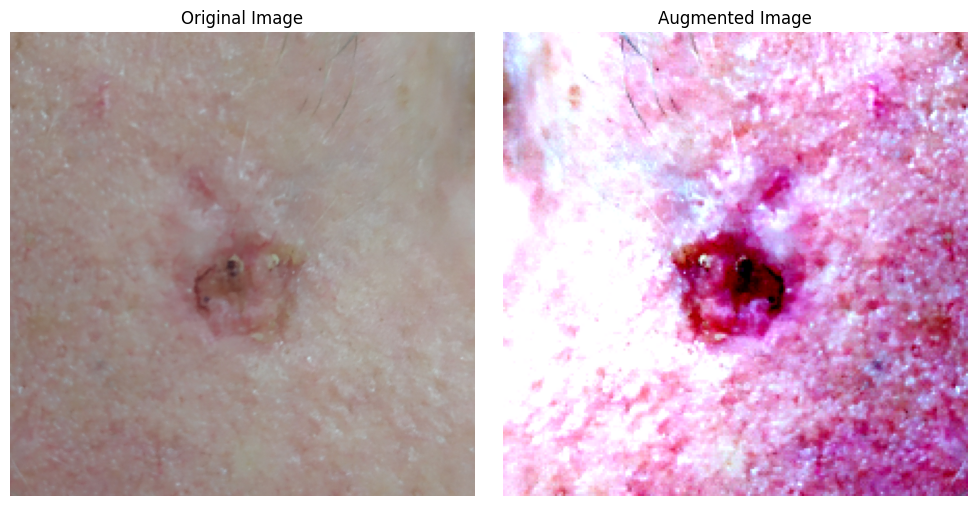

In [ ]:
import matplotlib.pyplot as plt

example = train_ds_clinical[29]
original_image = example['image']
augmented_image = example['pixel_values']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(augmented_image)
axes[1].set_title("Augmented Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/resnet50.tv_in1k and are newly initialized because the shapes did not match:
- timm_model.fc.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.fc.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4 #1e-5
batch_size = 64 #32
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts",
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Dermoscopic

In [ ]:
train_dataset = train_ds_dermoscopic
eval_dataset = val_ds_dermoscopic

trainer_cnn_dermoscopic = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

In [ ]:
trainer_cnn_dermoscopic.train()

TrainOutput(global_step=138, training_loss=0.15924850214218747, metrics={'train_runtime': 905.8695, 'train_samples_per_second': 41.231, 'train_steps_per_second': 0.331, 'total_flos': 3.6484546629371904e+17, 'train_loss': 0.15924850214218747, 'epoch': 23.0})

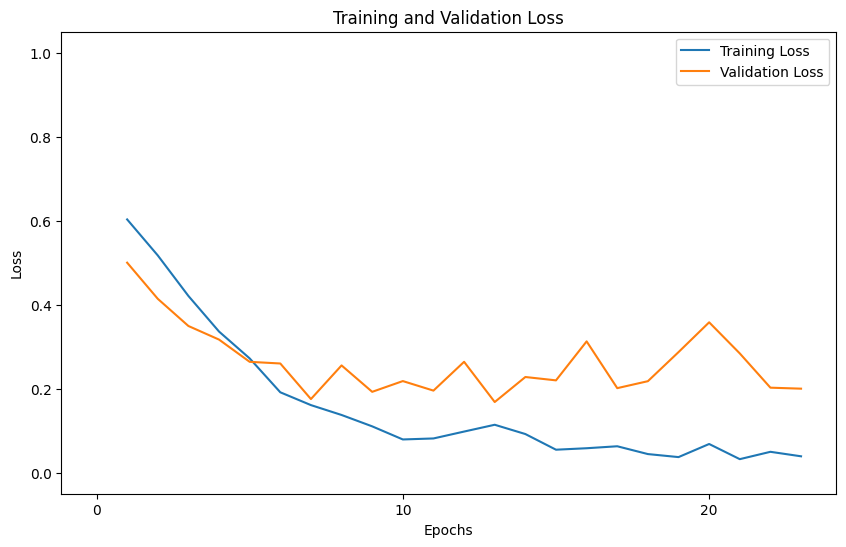

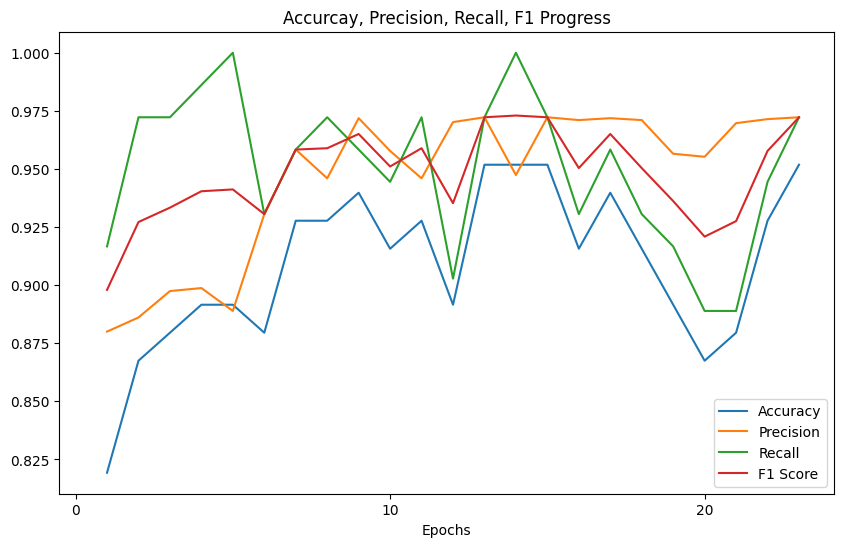

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_cnn_dermoscopic.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.25980204343795776, 'test_accuracy': 0.8888888888888888, 'test_precision': 0.9294117647058824, 'test_recall': 0.9349112426035503, 'test_f1': 0.9321533923303835, 'test_runtime': 2.7181, 'test_samples_per_second': 76.156, 'test_steps_per_second': 1.472}


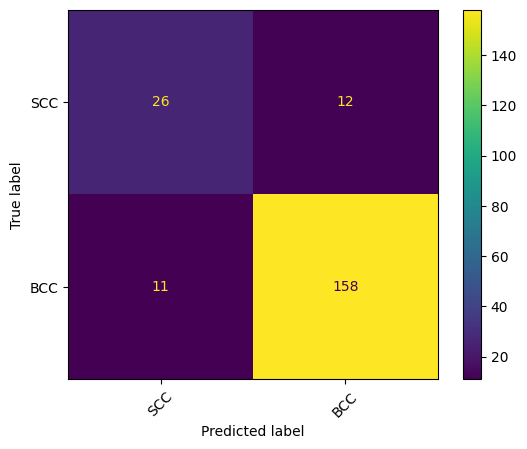

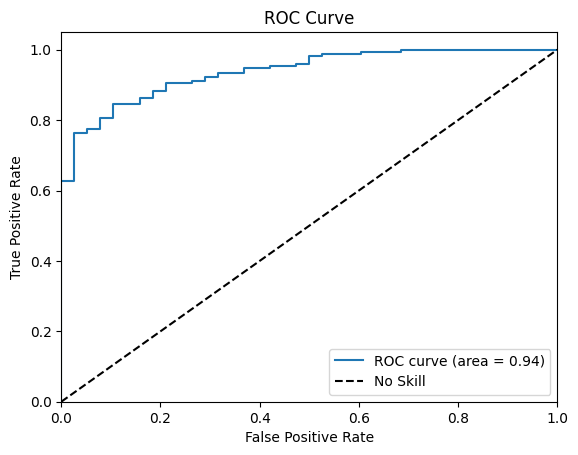

In [ ]:
outputs_cnn_d_d = trainer_cnn_dermoscopic.predict(test_ds_dermoscopic)
print(outputs_cnn_d_d.metrics)
plot_confusion_matrix(outputs_cnn_d_d)
plot_roc_curve(outputs_cnn_d_d)

### Testset: Clinical

{'test_loss': 0.9897469878196716, 'test_accuracy': 0.7874396135265701, 'test_precision': 0.8306878306878307, 'test_recall': 0.9289940828402367, 'test_f1': 0.8770949720670391, 'test_runtime': 7.3788, 'test_samples_per_second': 28.053, 'test_steps_per_second': 0.542}


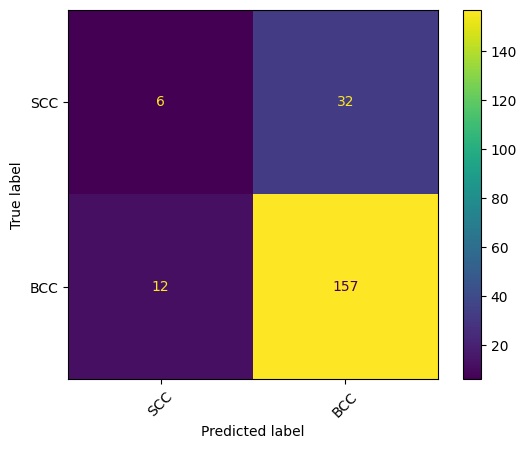

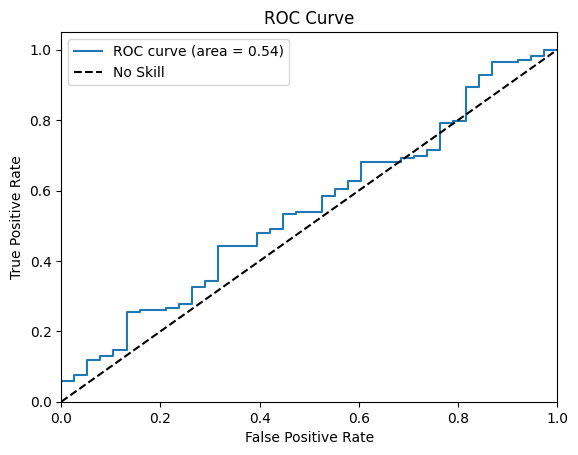

In [ ]:
outputs_cnn_d_c = trainer_cnn_dermoscopic.predict(test_ds_clinical)
print(outputs_cnn_d_c.metrics)
plot_confusion_matrix(outputs_cnn_d_c)
plot_roc_curve(outputs_cnn_d_c)

### Testset: Mixed

{'test_loss': 0.6030259728431702, 'test_accuracy': 0.8454106280193237, 'test_precision': 0.88268156424581, 'test_recall': 0.9349112426035503, 'test_f1': 0.9080459770114943, 'test_runtime': 5.76, 'test_samples_per_second': 35.938, 'test_steps_per_second': 0.694}


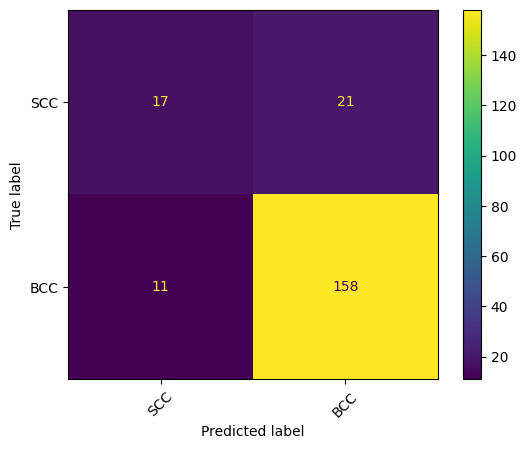

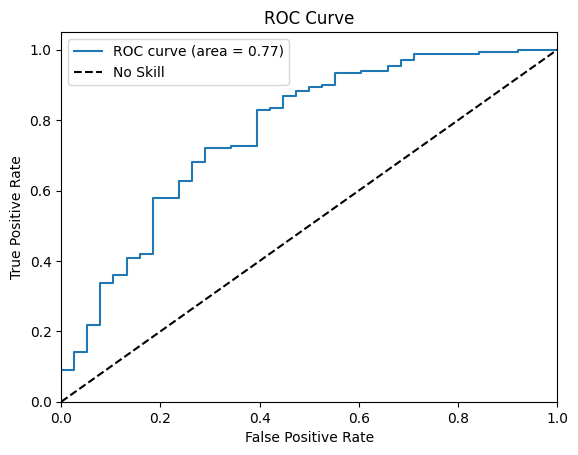

In [ ]:
outputs_cnn_d_m = trainer_cnn_dermoscopic.predict(test_ds_mixed)
print(outputs_cnn_d_m.metrics)
plot_confusion_matrix(outputs_cnn_d_m)
plot_roc_curve(outputs_cnn_d_m)

In [ ]:
shutil.rmtree('/content/resnet50.tv_in1k-finetuned')

# Training CNN (Clinical)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/resnet50.tv_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

{'input_size': (3, 224, 224),
 'interpolation': 'bilinear',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.875,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/resnet50.tv_in1k and are newly initialized because the shapes did not match:
- timm_model.fc.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.fc.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts",
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Clinical

In [ ]:
train_dataset = train_ds_clinical
eval_dataset = val_ds_clinical

trainer_cnn_clinical = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

In [ ]:
trainer_cnn_clinical.train()

TrainOutput(global_step=78, training_loss=0.27037003483527744, metrics={'train_runtime': 761.4259, 'train_samples_per_second': 49.053, 'train_steps_per_second': 0.394, 'total_flos': 2.0621700268775424e+17, 'train_loss': 0.27037003483527744, 'epoch': 13.0})

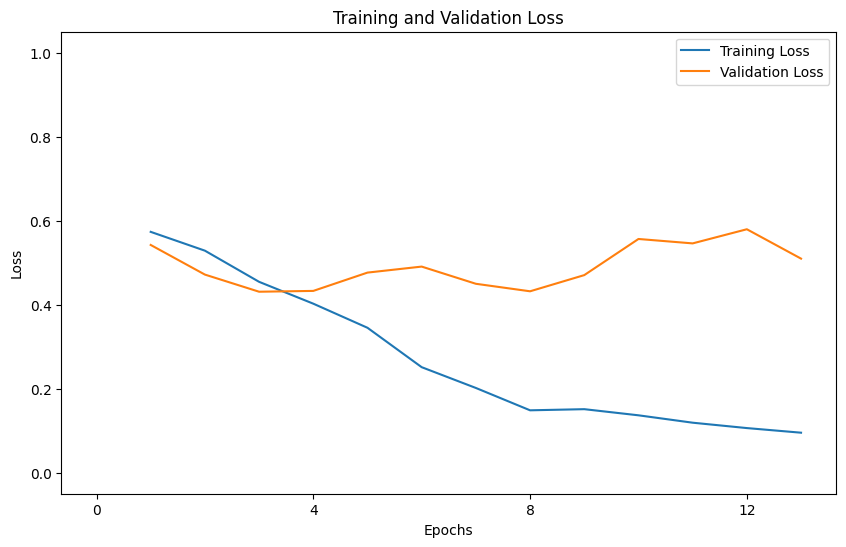

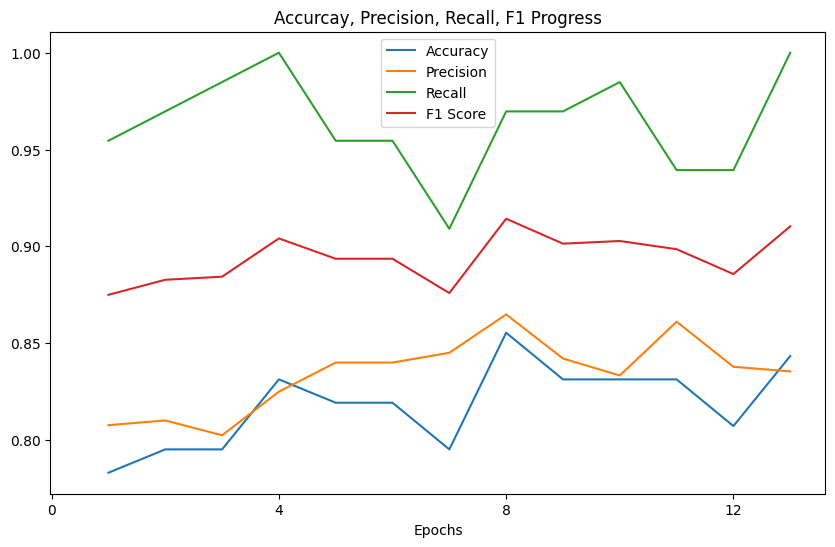

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_cnn_clinical.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.4835737347602844, 'test_accuracy': 0.8164251207729468, 'test_precision': 0.8164251207729468, 'test_recall': 1.0, 'test_f1': 0.898936170212766, 'test_runtime': 2.6661, 'test_samples_per_second': 77.643, 'test_steps_per_second': 1.5}


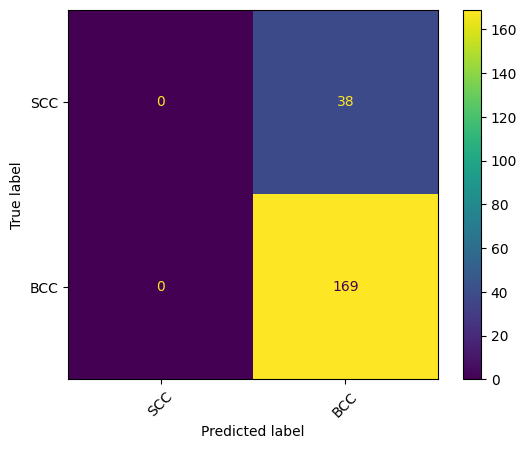

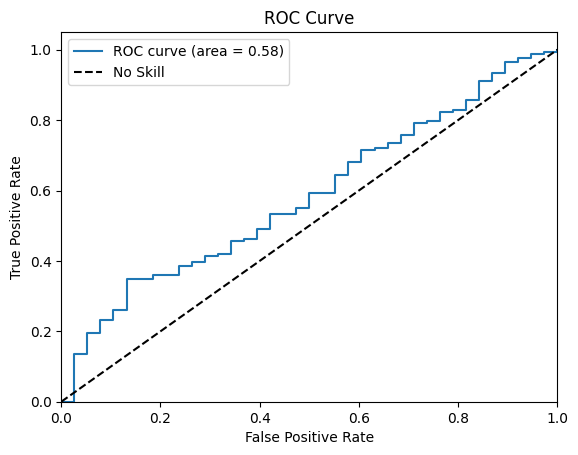

In [ ]:
outputs_cnn_c_d = trainer_cnn_clinical.predict(test_ds_dermoscopic)
print(outputs_cnn_c_d.metrics)
plot_confusion_matrix(outputs_cnn_c_d)
plot_roc_curve(outputs_cnn_c_d)

### Testset: Clinical

{'test_loss': 0.4471014738082886, 'test_accuracy': 0.8164251207729468, 'test_precision': 0.8164251207729468, 'test_recall': 1.0, 'test_f1': 0.898936170212766, 'test_runtime': 7.0066, 'test_samples_per_second': 29.543, 'test_steps_per_second': 0.571}


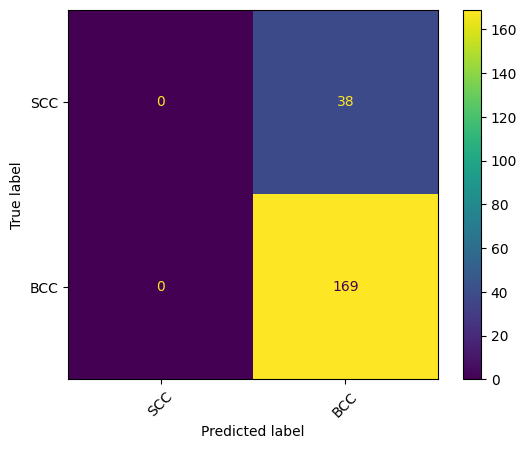

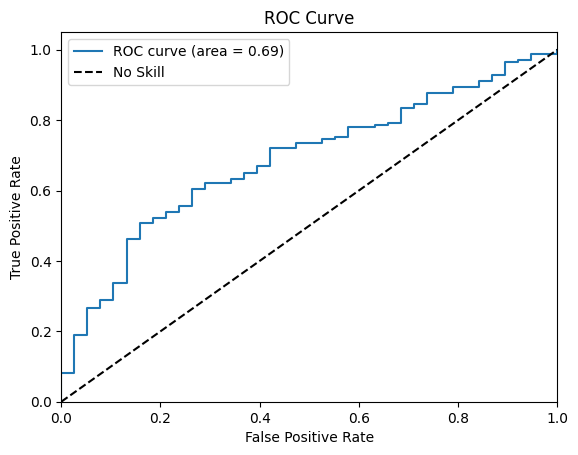

In [ ]:
outputs_cnn_c_c = trainer_cnn_clinical.predict(test_ds_clinical)
print(outputs_cnn_c_c.metrics)
plot_confusion_matrix(outputs_cnn_c_c)
plot_roc_curve(outputs_cnn_c_c)

### Testset: Mixed

{'test_loss': 0.45211294293403625, 'test_accuracy': 0.8164251207729468, 'test_precision': 0.8164251207729468, 'test_recall': 1.0, 'test_f1': 0.898936170212766, 'test_runtime': 5.4971, 'test_samples_per_second': 37.656, 'test_steps_per_second': 0.728}


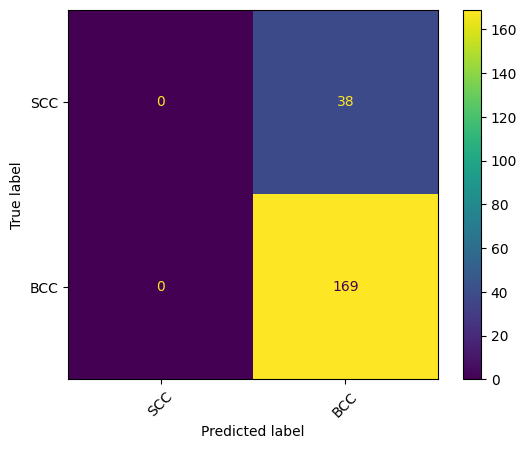

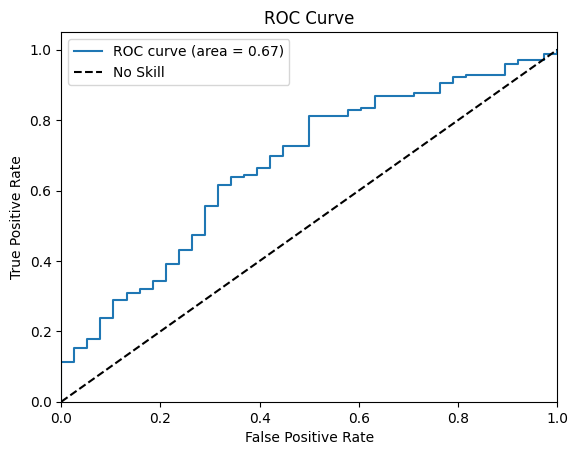

In [ ]:
outputs_cnn_c_m = trainer_cnn_clinical.predict(test_ds_mixed)
print(outputs_cnn_c_m.metrics)
plot_confusion_matrix(outputs_cnn_c_m)
plot_roc_curve(outputs_cnn_c_m)

In [ ]:
shutil.rmtree('/content/resnet50.tv_in1k-finetuned')

# Training CNN (Mixed)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/resnet50.tv_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

{'input_size': (3, 224, 224),
 'interpolation': 'bilinear',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.875,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/resnet50.tv_in1k and are newly initialized because the shapes did not match:
- timm_model.fc.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.fc.weight: found shape torch.Size([1000, 2048]) in the checkpoint and torch.Size([2, 2048]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4 #1e-5
batch_size = 64 #32
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts",
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Mixed

In [ ]:
train_dataset = train_ds_mixed
eval_dataset = val_ds_mixed

trainer_cnn_mixed = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

In [ ]:
trainer_cnn_mixed.train()

TrainOutput(global_step=84, training_loss=0.2512823059445336, metrics={'train_runtime': 704.7585, 'train_samples_per_second': 52.997, 'train_steps_per_second': 0.426, 'total_flos': 2.2207984904835072e+17, 'train_loss': 0.2512823059445336, 'epoch': 14.0})

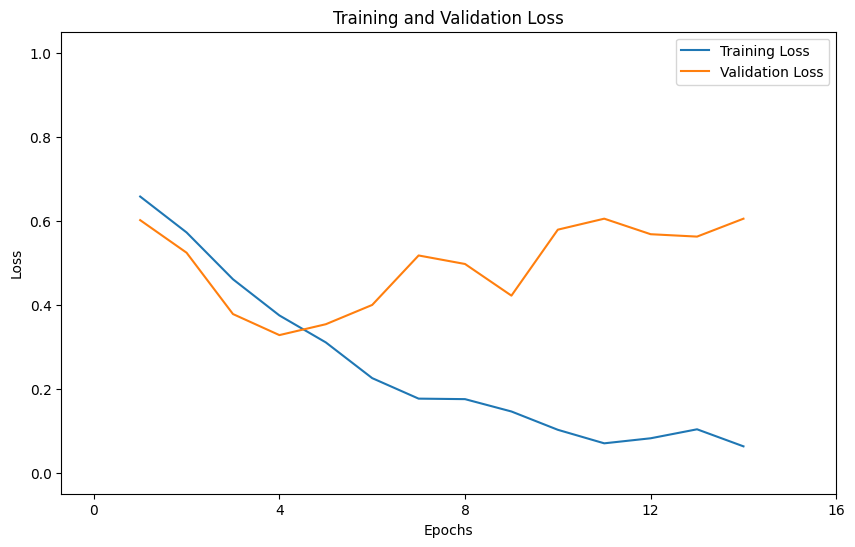

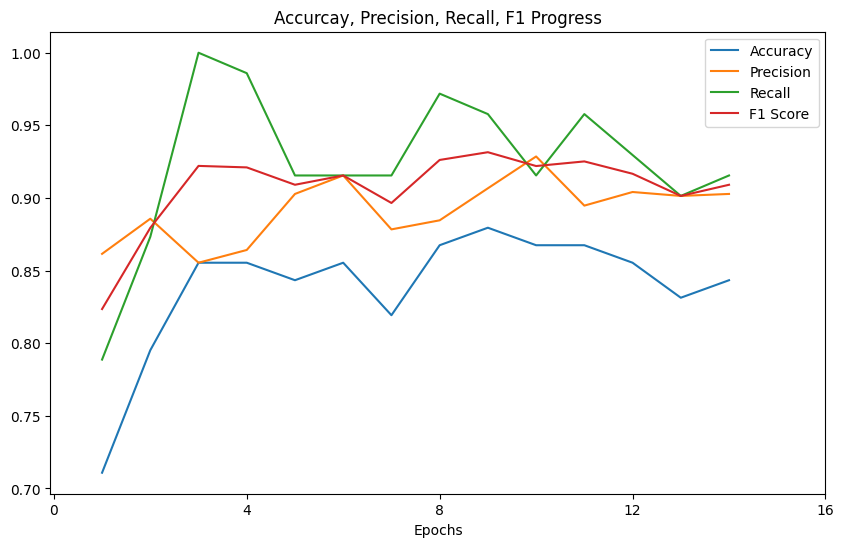

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_cnn_mixed.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.3659808039665222, 'test_accuracy': 0.8405797101449275, 'test_precision': 0.84, 'test_recall': 0.9940828402366864, 'test_f1': 0.9105691056910569, 'test_runtime': 2.6434, 'test_samples_per_second': 78.307, 'test_steps_per_second': 1.513}


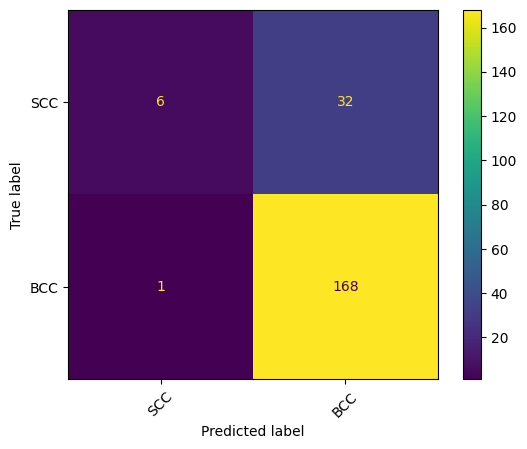

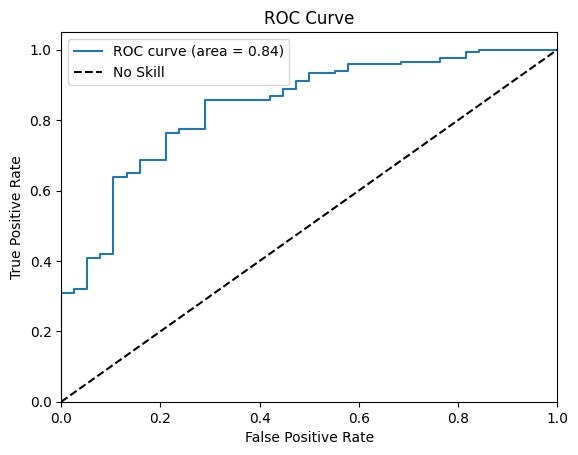

In [ ]:
outputs_cnn_m_d = trainer_cnn_mixed.predict(test_ds_dermoscopic)
print(outputs_cnn_m_d.metrics)
plot_confusion_matrix(outputs_cnn_m_d)
plot_roc_curve(outputs_cnn_m_d)

### Testset: Clinical

{'test_loss': 0.48669135570526123, 'test_accuracy': 0.8164251207729468, 'test_precision': 0.8195121951219512, 'test_recall': 0.9940828402366864, 'test_f1': 0.8983957219251337, 'test_runtime': 7.0631, 'test_samples_per_second': 29.307, 'test_steps_per_second': 0.566}


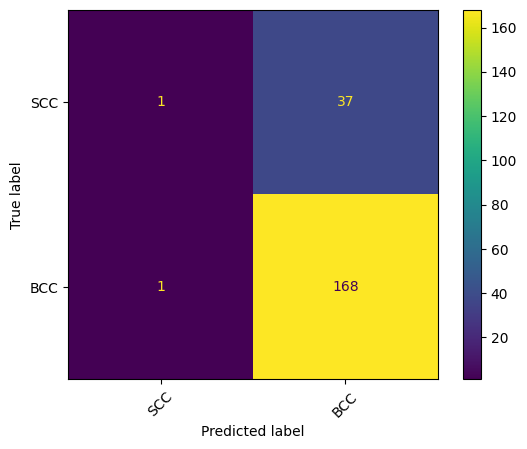

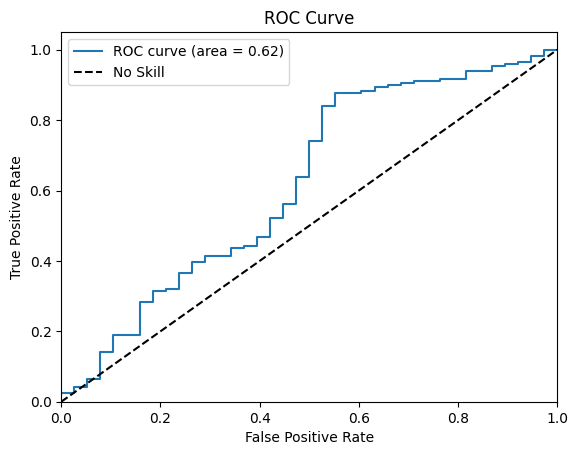

In [ ]:
outputs_cnn_m_c = trainer_cnn_mixed.predict(test_ds_clinical)
print(outputs_cnn_m_c.metrics)
plot_confusion_matrix(outputs_cnn_m_c)
plot_roc_curve(outputs_cnn_m_c)

### Testset: Mixed

{'test_loss': 0.40403667092323303, 'test_accuracy': 0.8309178743961353, 'test_precision': 0.8316831683168316, 'test_recall': 0.9940828402366864, 'test_f1': 0.9056603773584906, 'test_runtime': 5.5247, 'test_samples_per_second': 37.468, 'test_steps_per_second': 0.724}


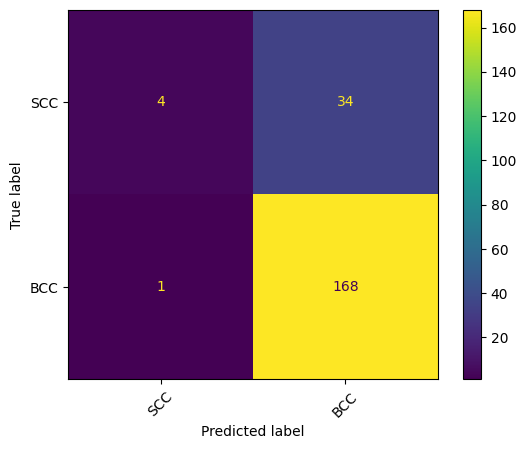

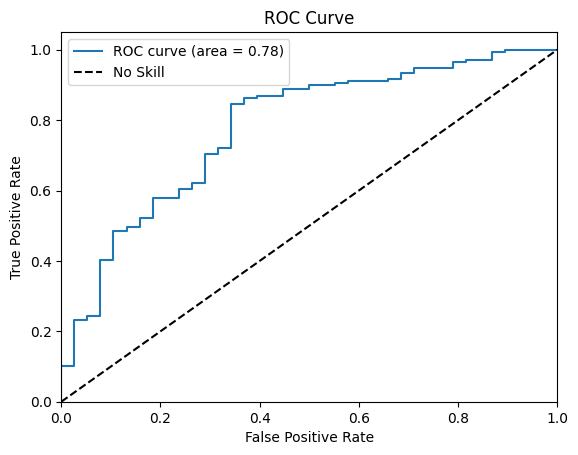

In [ ]:
outputs_cnn_m_m = trainer_cnn_mixed.predict(test_ds_mixed)
print(outputs_cnn_m_m.metrics)
plot_confusion_matrix(outputs_cnn_m_m)
plot_roc_curve(outputs_cnn_m_m)

In [ ]:
shutil.rmtree('/content/resnet50.tv_in1k-finetuned')

# Training ViT (Dermoscopic)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/vit_base_patch16_224.augreg_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.5, 0.5, 0.5),
 'std': (0.5, 0.5, 0.5),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/vit_base_patch16_224.augreg_in1k and are newly initialized because the shapes did not match:
- timm_model.head.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Dermoscopic

In [ ]:
train_dataset = train_ds_dermoscopic
eval_dataset = val_ds_dermoscopic

trainer_vit_dermoscopic = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_vit_dermoscopic.train()

TrainOutput(global_step=90, training_loss=0.18771087560388777, metrics={'train_runtime': 658.3133, 'train_samples_per_second': 56.736, 'train_steps_per_second': 0.456, 'total_flos': 8.682977436315034e+17, 'train_loss': 0.18771087560388777, 'epoch': 15.0})

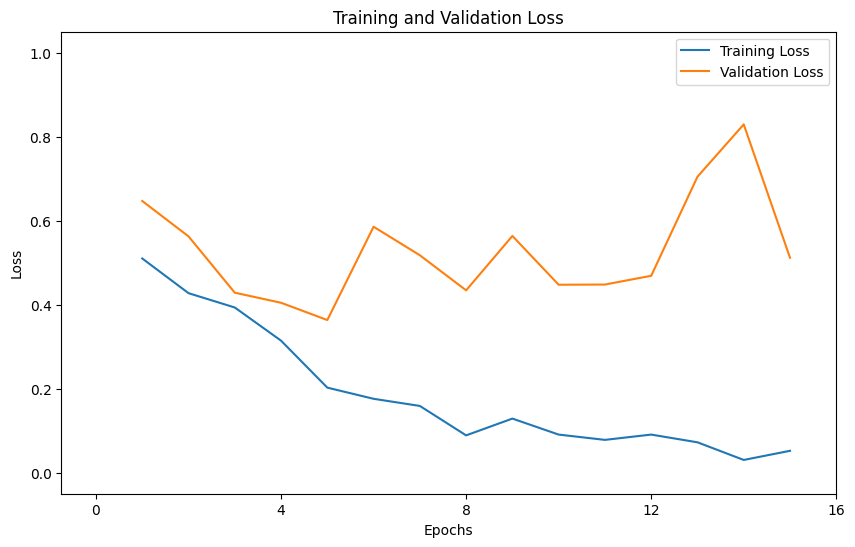

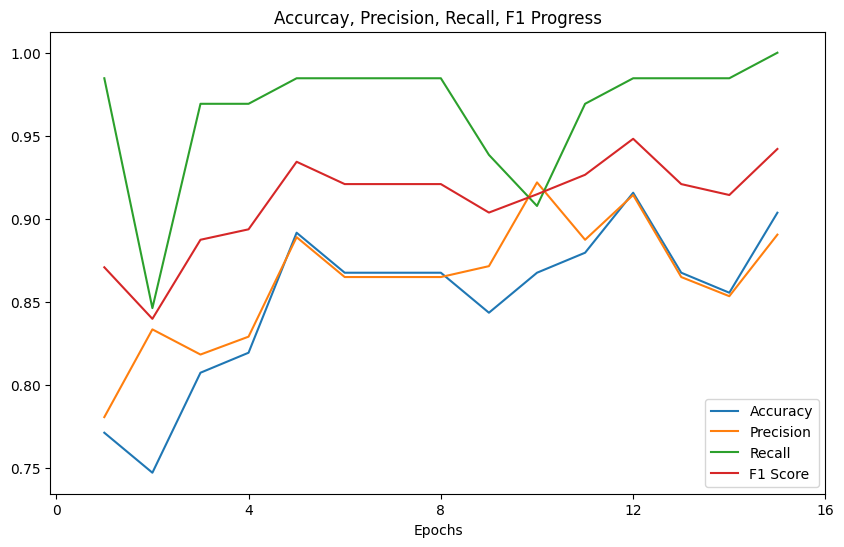

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_vit_dermoscopic.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.27945706248283386, 'test_accuracy': 0.8888888888888888, 'test_precision': 0.9244186046511628, 'test_recall': 0.9408284023668639, 'test_f1': 0.9325513196480938, 'test_runtime': 3.057, 'test_samples_per_second': 67.714, 'test_steps_per_second': 1.308}


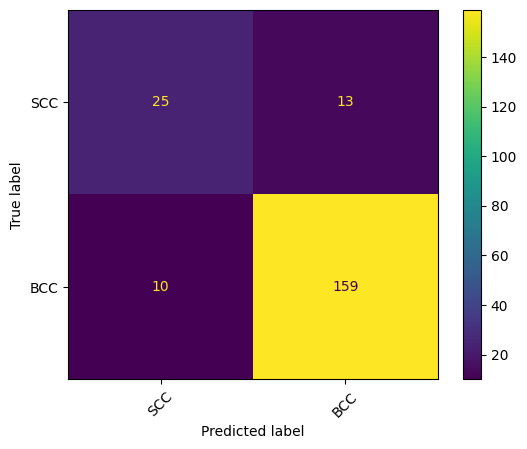

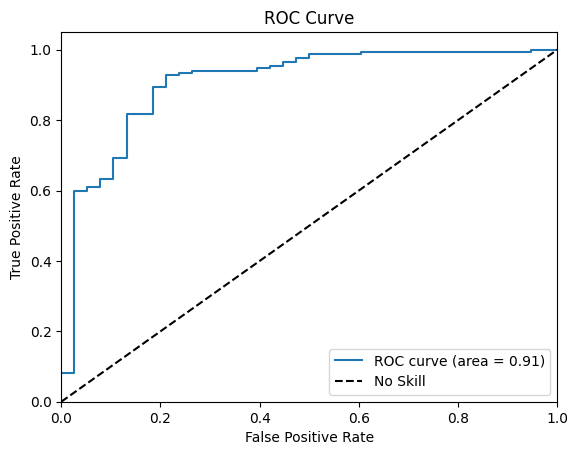

In [ ]:
outputs_vit_d_d = trainer_vit_dermoscopic.predict(test_ds_dermoscopic)
print(outputs_vit_d_d.metrics)
plot_confusion_matrix(outputs_vit_d_d)
plot_roc_curve(outputs_vit_d_d)

### Testset: Clinical

{'test_loss': 0.546069324016571, 'test_accuracy': 0.8067632850241546, 'test_precision': 0.8449197860962567, 'test_recall': 0.9349112426035503, 'test_f1': 0.8876404494382022, 'test_runtime': 7.4523, 'test_samples_per_second': 27.777, 'test_steps_per_second': 0.537}


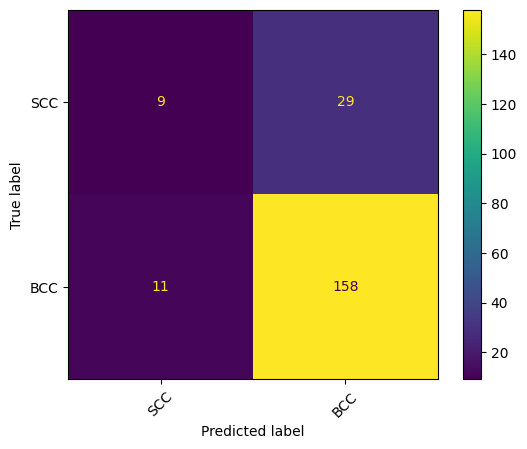

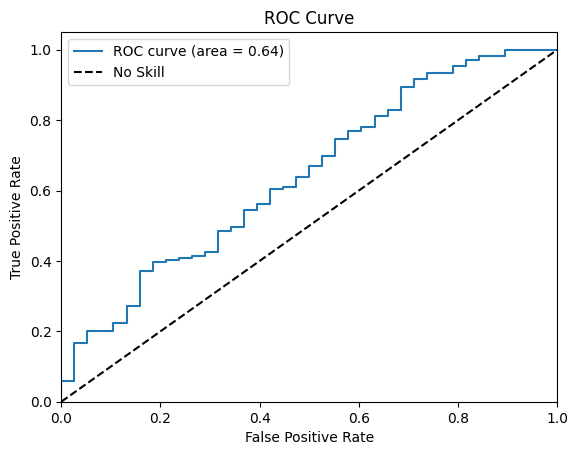

In [ ]:
outputs_vit_d_c = trainer_vit_dermoscopic.predict(test_ds_clinical)
print(outputs_vit_d_c.metrics)
plot_confusion_matrix(outputs_vit_d_c)
plot_roc_curve(outputs_vit_d_c)

### Testset: Mixed

{'test_loss': 0.37833383679389954, 'test_accuracy': 0.8647342995169082, 'test_precision': 0.8810810810810811, 'test_recall': 0.9644970414201184, 'test_f1': 0.9209039548022598, 'test_runtime': 5.9636, 'test_samples_per_second': 34.71, 'test_steps_per_second': 0.671}


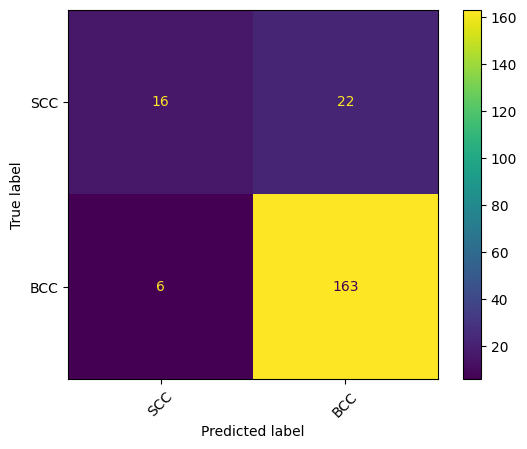

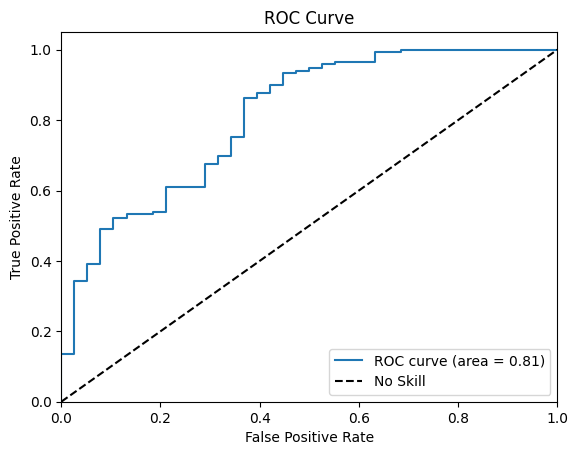

In [ ]:
outputs_vit_d_m = trainer_vit_dermoscopic.predict(test_ds_mixed)
print(outputs_vit_d_m.metrics)
plot_confusion_matrix(outputs_vit_d_m)
plot_roc_curve(outputs_vit_d_m)

In [ ]:
shutil.rmtree('/content/vit_base_patch16_224.augreg_in1k-finetuned')

# Training ViT (Clinical)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/vit_base_patch16_224.augreg_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.5, 0.5, 0.5),
 'std': (0.5, 0.5, 0.5),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/vit_base_patch16_224.augreg_in1k and are newly initialized because the shapes did not match:
- timm_model.head.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Clinical

In [ ]:
train_dataset = train_ds_clinical
eval_dataset = val_ds_clinical

trainer_vit_clinical = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_vit_clinical.train()

TrainOutput(global_step=96, training_loss=0.21334320151557526, metrics={'train_runtime': 1037.2011, 'train_samples_per_second': 36.01, 'train_steps_per_second': 0.289, 'total_flos': 9.261842598736036e+17, 'train_loss': 0.21334320151557526, 'epoch': 16.0})

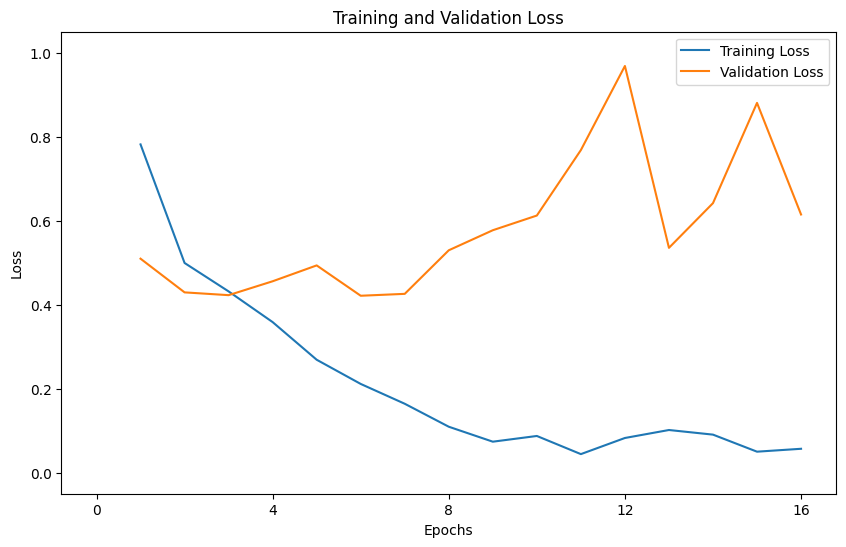

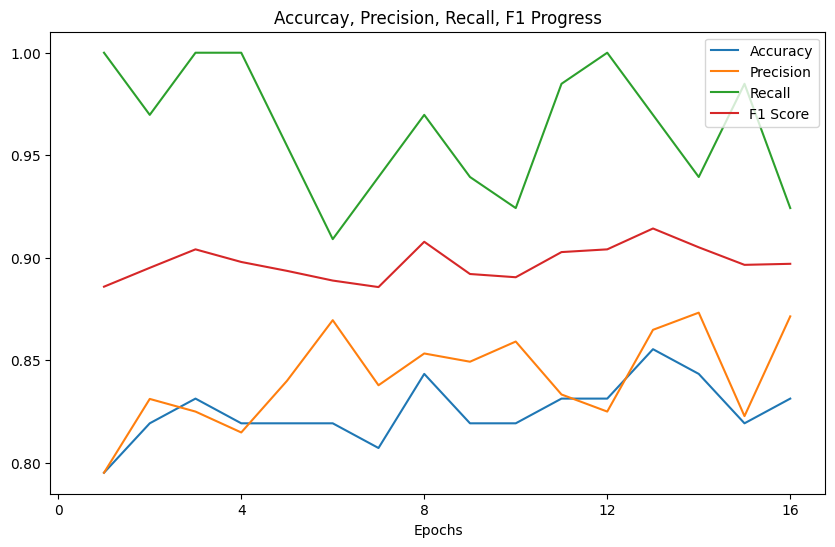

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_vit_clinical.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.447579950094223, 'test_accuracy': 0.8357487922705314, 'test_precision': 0.8497409326424871, 'test_recall': 0.9704142011834319, 'test_f1': 0.9060773480662984, 'test_runtime': 3.0027, 'test_samples_per_second': 68.938, 'test_steps_per_second': 1.332}


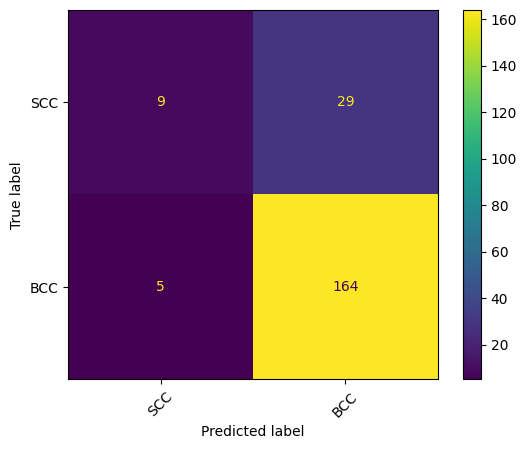

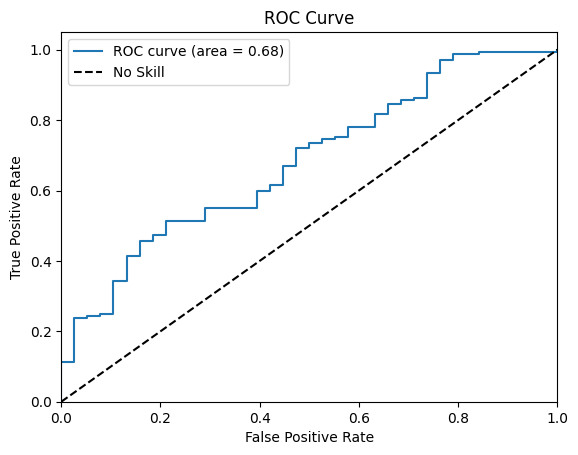

In [ ]:
outputs_vit_c_d = trainer_vit_clinical.predict(test_ds_dermoscopic)
print(outputs_vit_c_d.metrics)
plot_confusion_matrix(outputs_vit_c_d)
plot_roc_curve(outputs_vit_c_d)

### Testset: Clinical

{'test_loss': 0.5296331644058228, 'test_accuracy': 0.7874396135265701, 'test_precision': 0.8787878787878788, 'test_recall': 0.8579881656804734, 'test_f1': 0.8682634730538922, 'test_runtime': 7.4886, 'test_samples_per_second': 27.642, 'test_steps_per_second': 0.534}


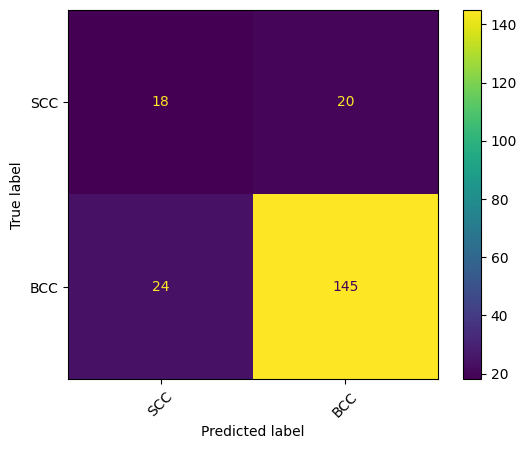

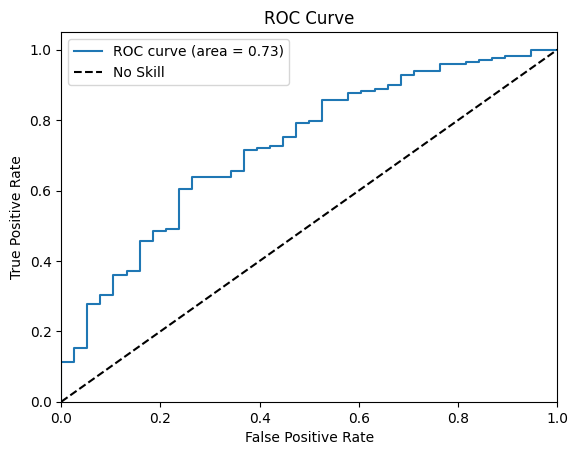

In [ ]:
outputs_vit_c_c = trainer_vit_clinical.predict(test_ds_clinical)
print(outputs_vit_c_c.metrics)
plot_confusion_matrix(outputs_vit_c_c)
plot_roc_curve(outputs_vit_c_c)

### Testset: Mixed

{'test_loss': 0.4501710534095764, 'test_accuracy': 0.821256038647343, 'test_precision': 0.8793103448275862, 'test_recall': 0.9053254437869822, 'test_f1': 0.892128279883382, 'test_runtime': 5.9296, 'test_samples_per_second': 34.909, 'test_steps_per_second': 0.675}


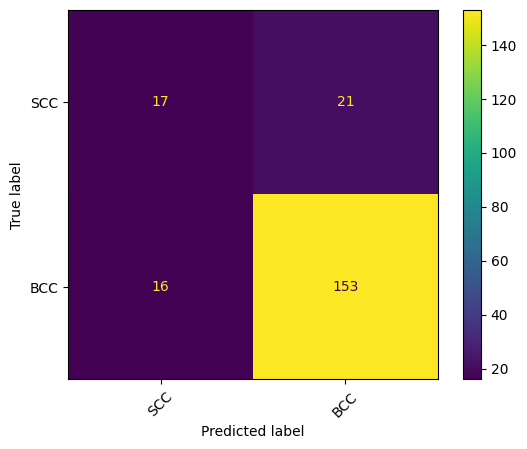

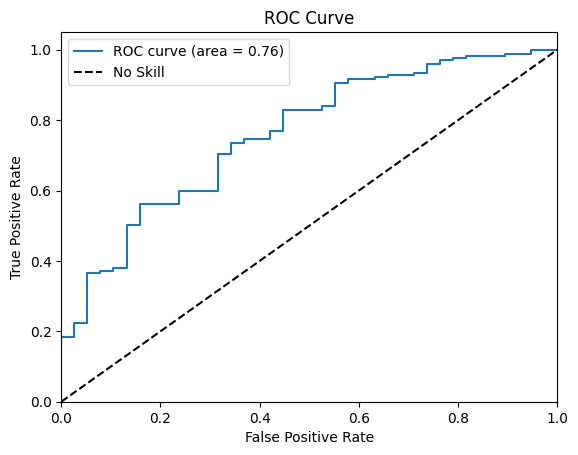

In [ ]:
outputs_vit_c_m = trainer_vit_clinical.predict(test_ds_mixed)
print(outputs_vit_c_m.metrics)
plot_confusion_matrix(outputs_vit_c_m)
plot_roc_curve(outputs_vit_c_m)

In [ ]:
shutil.rmtree('/content/vit_base_patch16_224.augreg_in1k-finetuned')

#Training ViT (Mixed)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/vit_base_patch16_224.augreg_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.5, 0.5, 0.5),
 'std': (0.5, 0.5, 0.5),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/vit_base_patch16_224.augreg_in1k and are newly initialized because the shapes did not match:
- timm_model.head.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Mixed

In [ ]:
train_dataset = train_ds_mixed
eval_dataset = val_ds_mixed

trainer_vit_mixed = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_vit_mixed.train()

TrainOutput(global_step=102, training_loss=0.19237874010029962, metrics={'train_runtime': 934.4799, 'train_samples_per_second': 39.969, 'train_steps_per_second': 0.321, 'total_flos': 9.840707761157038e+17, 'train_loss': 0.19237874010029962, 'epoch': 17.0})

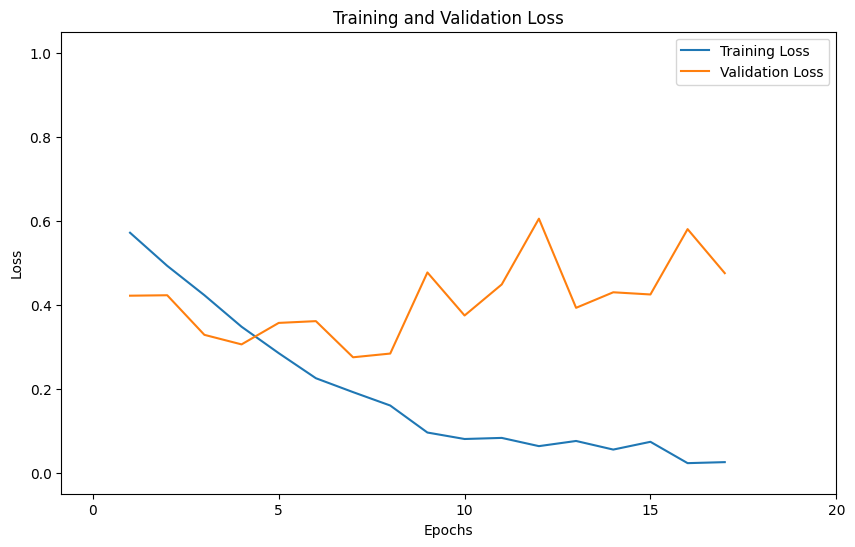

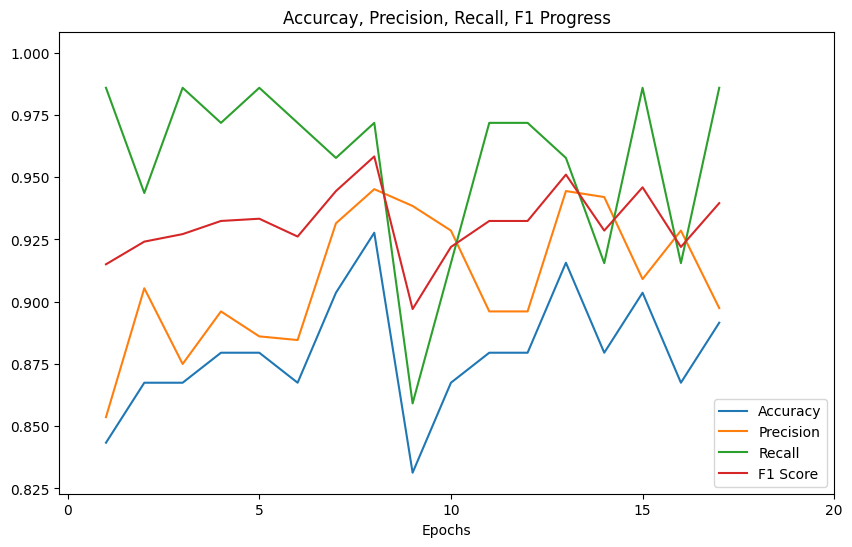

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_vit_mixed.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.3381463289260864, 'test_accuracy': 0.8743961352657005, 'test_precision': 0.9132947976878613, 'test_recall': 0.9349112426035503, 'test_f1': 0.9239766081871345, 'test_runtime': 3.1444, 'test_samples_per_second': 65.831, 'test_steps_per_second': 1.272}


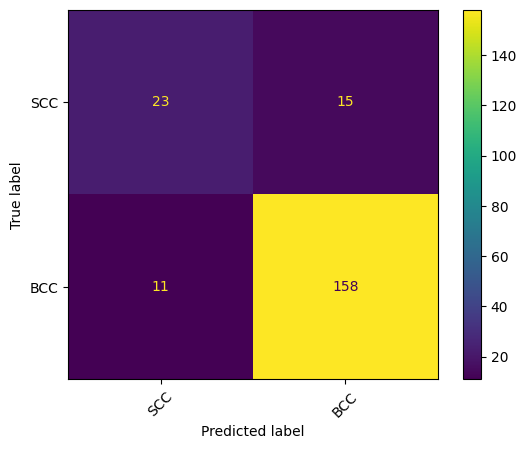

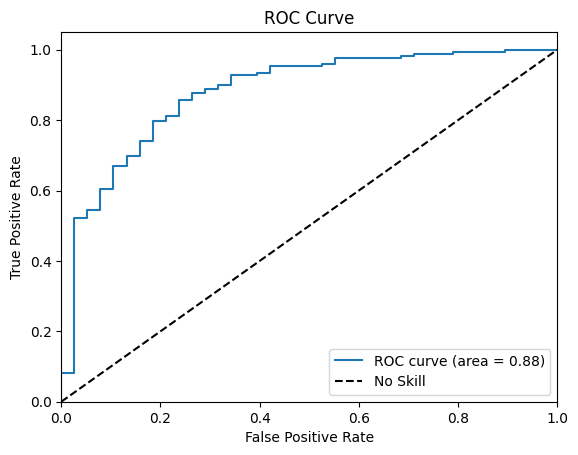

{'test_loss': 0.3381463289260864,
 'test_accuracy': 0.8743961352657005,
 'test_precision': 0.9132947976878613,
 'test_recall': 0.9349112426035503,
 'test_f1': 0.9239766081871345,
 'test_runtime': 3.1444,
 'test_samples_per_second': 65.831,
 'test_steps_per_second': 1.272}

In [ ]:
outputs_vit_m_d = trainer_vit_mixed.predict(test_ds_dermoscopic)
print(outputs_vit_m_d.metrics)
plot_confusion_matrix(outputs_vit_m_d)
plot_roc_curve(outputs_vit_m_d)
outputs_vit_m_d.metrics

### Testset: Clinical

{'test_loss': 0.497532457113266, 'test_accuracy': 0.8260869565217391, 'test_precision': 0.8375634517766497, 'test_recall': 0.9763313609467456, 'test_f1': 0.9016393442622951, 'test_runtime': 7.4681, 'test_samples_per_second': 27.718, 'test_steps_per_second': 0.536}


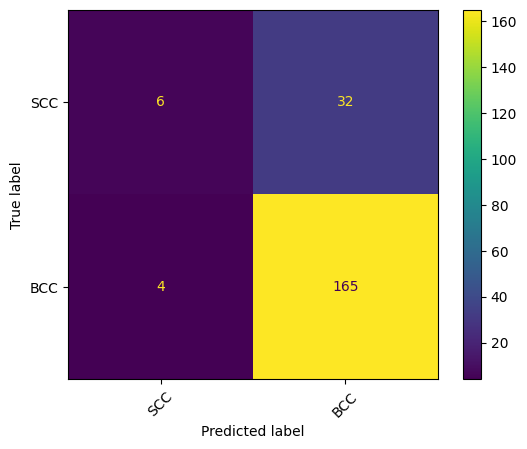

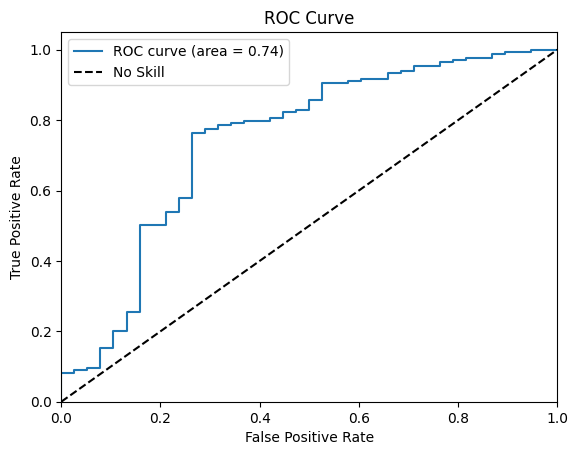

{'test_loss': 0.497532457113266,
 'test_accuracy': 0.8260869565217391,
 'test_precision': 0.8375634517766497,
 'test_recall': 0.9763313609467456,
 'test_f1': 0.9016393442622951,
 'test_runtime': 7.4681,
 'test_samples_per_second': 27.718,
 'test_steps_per_second': 0.536}

In [ ]:
outputs_vit_m_c = trainer_vit_mixed.predict(test_ds_clinical)
print(outputs_vit_m_c.metrics)
plot_confusion_matrix(outputs_vit_m_c)
plot_roc_curve(outputs_vit_m_c)
outputs_vit_m_c.metrics

### Testset: Mixed

{'test_loss': 0.34979012608528137, 'test_accuracy': 0.8647342995169082, 'test_precision': 0.873015873015873, 'test_recall': 0.9763313609467456, 'test_f1': 0.9217877094972067, 'test_runtime': 5.9356, 'test_samples_per_second': 34.875, 'test_steps_per_second': 0.674}


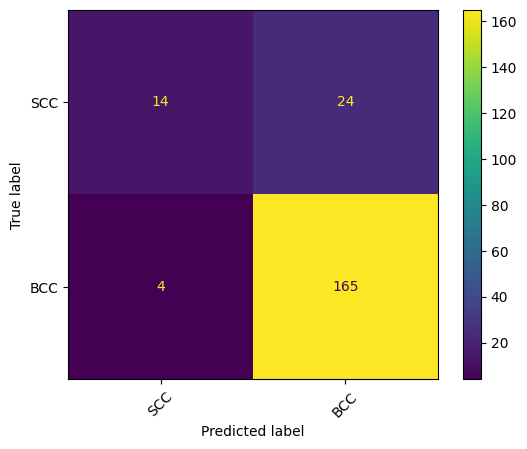

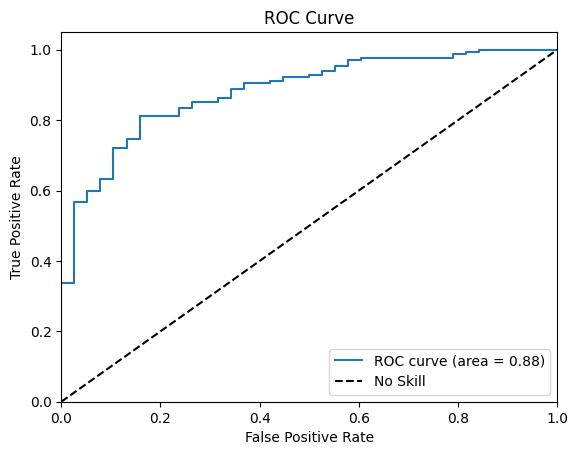

{'test_loss': 0.34979012608528137,
 'test_accuracy': 0.8647342995169082,
 'test_precision': 0.873015873015873,
 'test_recall': 0.9763313609467456,
 'test_f1': 0.9217877094972067,
 'test_runtime': 5.9356,
 'test_samples_per_second': 34.875,
 'test_steps_per_second': 0.674}

In [ ]:
outputs_vit_m_m = trainer_vit_mixed.predict(test_ds_mixed)
print(outputs_vit_m_m.metrics)
plot_confusion_matrix(outputs_vit_m_m)
plot_roc_curve(outputs_vit_m_m)
outputs_vit_m_m.metrics

In [ ]:
shutil.rmtree('/content/vit_base_patch16_224.augreg_in1k-finetuned')

# Training: Swin (Dermoscopic)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/swinv2_base_window8_256.ms_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

{'input_size': (3, 256, 256),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.5
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

model.safetensors:   0%|          | 0.00/354M [00:00<?, ?B/s]

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/swinv2_base_window8_256.ms_in1k and are newly initialized because the shapes did not match:
- timm_model.head.fc.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.fc.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Dermoscopic

In [ ]:
train_dataset = train_ds_dermoscopic
eval_dataset = val_ds_dermoscopic

trainer_swin_dermoscopic = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_swin_dermoscopic.train()

TrainOutput(global_step=102, training_loss=0.28876404376590953, metrics={'train_runtime': 795.5985, 'train_samples_per_second': 46.946, 'train_steps_per_second': 0.377, 'total_flos': 1.3017304820620984e+18, 'train_loss': 0.28876404376590953, 'epoch': 17.0})

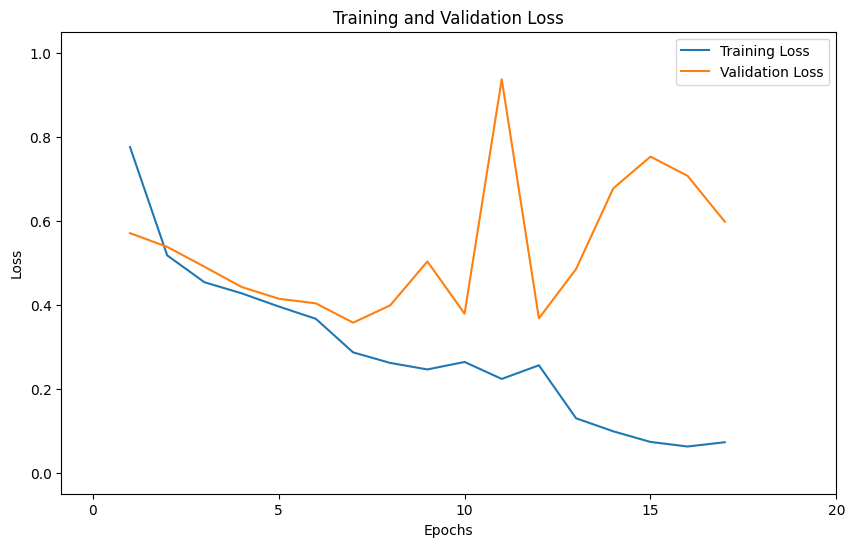

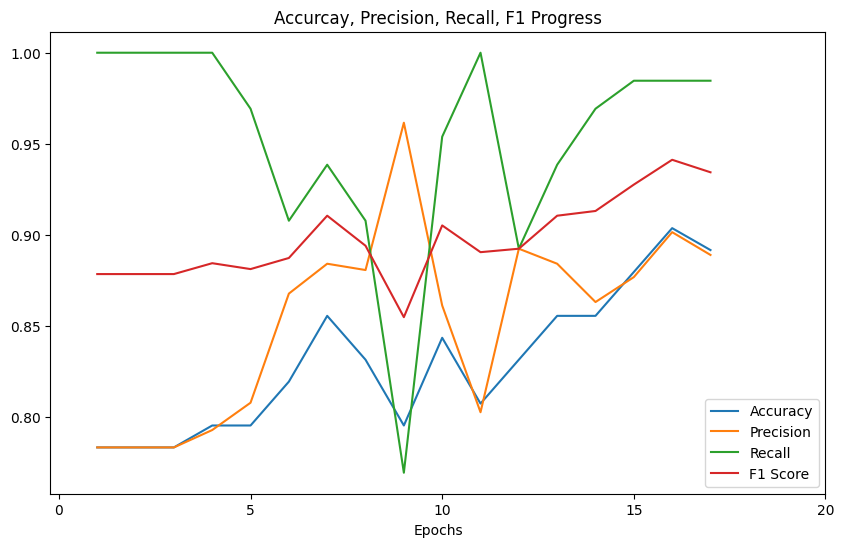

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_swin_dermoscopic.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.3002130389213562, 'test_accuracy': 0.893719806763285, 'test_precision': 0.9349112426035503, 'test_recall': 0.9349112426035503, 'test_f1': 0.9349112426035503, 'test_runtime': 3.4051, 'test_samples_per_second': 60.79, 'test_steps_per_second': 1.175}


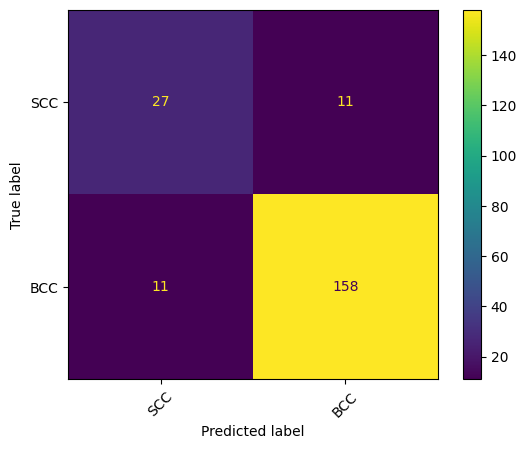

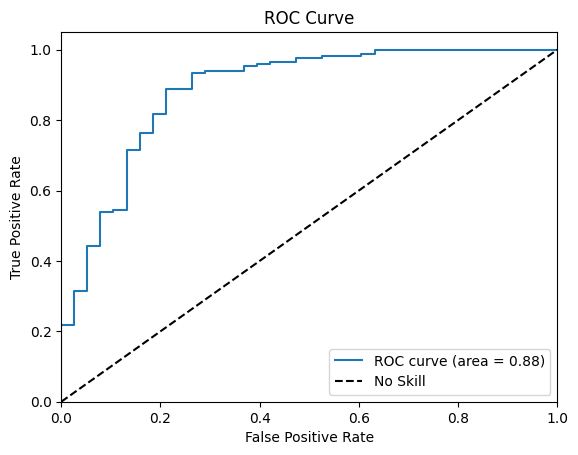

In [ ]:
outputs_swin_d_d = trainer_swin_dermoscopic.predict(test_ds_dermoscopic)
print(outputs_swin_d_d.metrics)
plot_confusion_matrix(outputs_swin_d_d)
plot_roc_curve(outputs_swin_d_d)

### Testset: Clinical

{'test_loss': 0.48181432485580444, 'test_accuracy': 0.7874396135265701, 'test_precision': 0.8378378378378378, 'test_recall': 0.9171597633136095, 'test_f1': 0.8757062146892656, 'test_runtime': 7.8578, 'test_samples_per_second': 26.343, 'test_steps_per_second': 0.509}


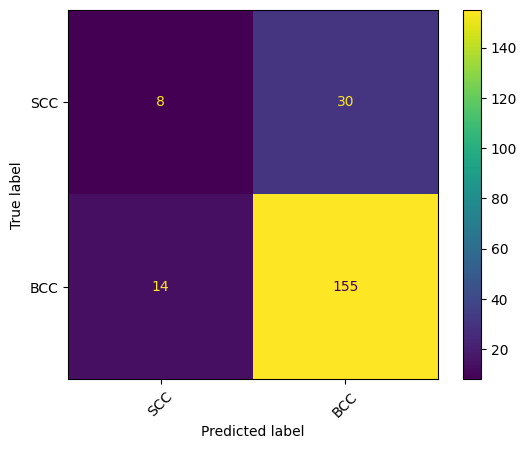

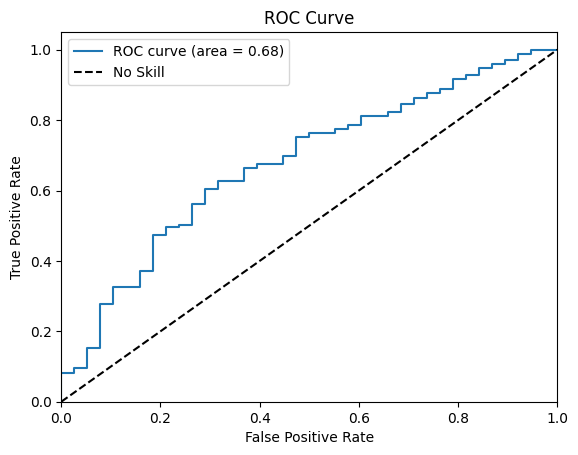

In [ ]:
outputs_swin_d_c = trainer_swin_dermoscopic.predict(test_ds_clinical)
print(outputs_swin_d_c.metrics)
plot_confusion_matrix(outputs_swin_d_c)
plot_roc_curve(outputs_swin_d_c)

### Testset: Mixed

{'test_loss': 0.3625391721725464, 'test_accuracy': 0.855072463768116, 'test_precision': 0.8971428571428571, 'test_recall': 0.9289940828402367, 'test_f1': 0.9127906976744186, 'test_runtime': 6.2397, 'test_samples_per_second': 33.175, 'test_steps_per_second': 0.641}


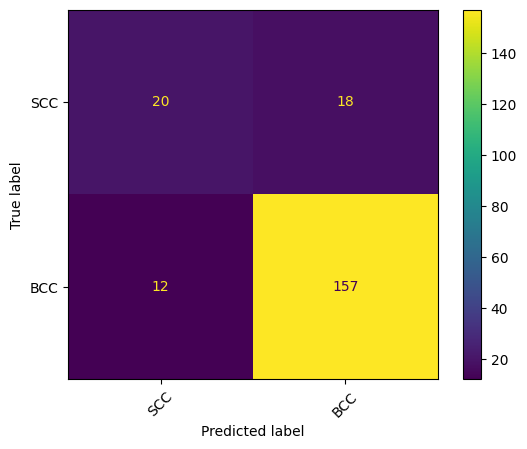

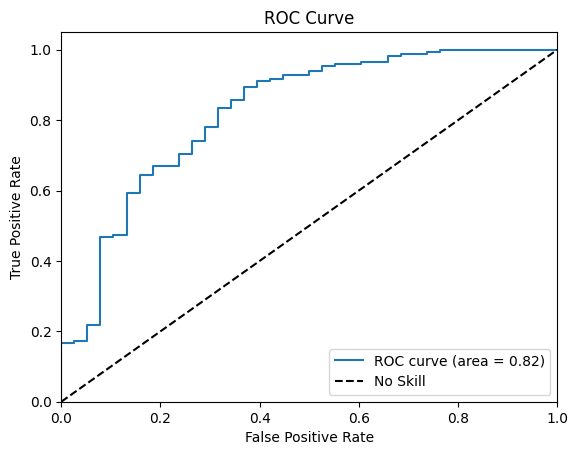

In [ ]:
outputs_swin_d_m = trainer_swin_dermoscopic.predict(test_ds_mixed)
print(outputs_swin_d_m.metrics)
plot_confusion_matrix(outputs_swin_d_m)
plot_roc_curve(outputs_swin_d_m)

In [ ]:
shutil.rmtree('/content/swinv2_base_window8_256.ms_in1k-finetuned')

# Training: Swin (Clinical)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/swinv2_base_window8_256.ms_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

{'input_size': (3, 256, 256),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.5
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/swinv2_base_window8_256.ms_in1k and are newly initialized because the shapes did not match:
- timm_model.head.fc.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.fc.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Clinical

In [ ]:
train_dataset = train_ds_clinical
eval_dataset = val_ds_clinical

trainer_swin_clinical = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_swin_clinical.train()

TrainOutput(global_step=96, training_loss=0.28815154638141394, metrics={'train_runtime': 1099.6936, 'train_samples_per_second': 33.964, 'train_steps_per_second': 0.273, 'total_flos': 1.225158100764328e+18, 'train_loss': 0.28815154638141394, 'epoch': 16.0})

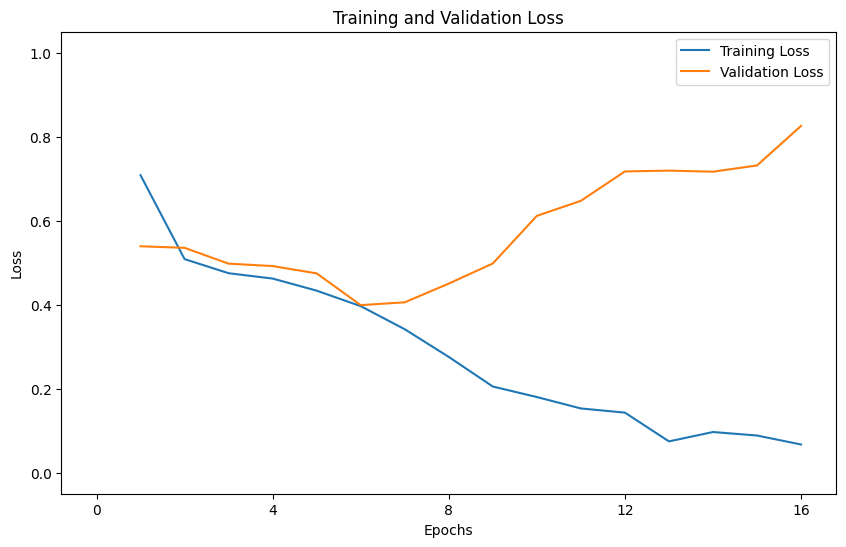

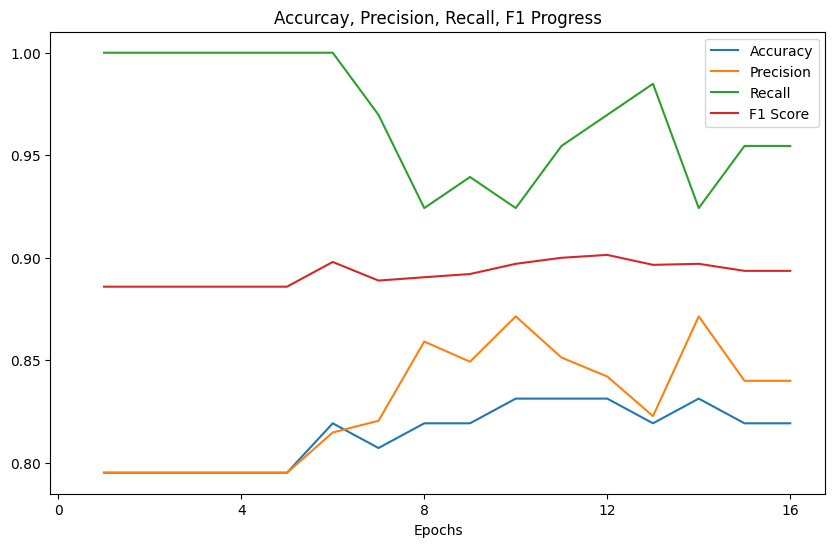

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_swin_clinical.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

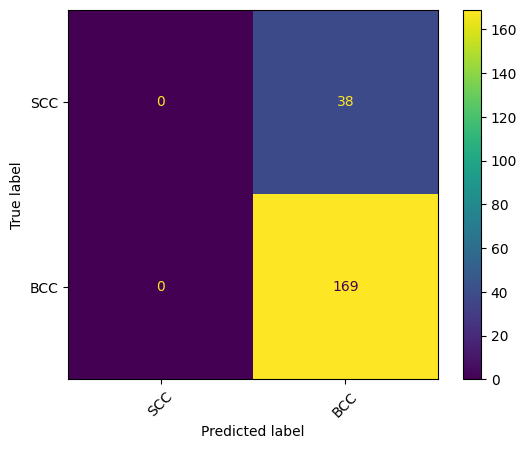

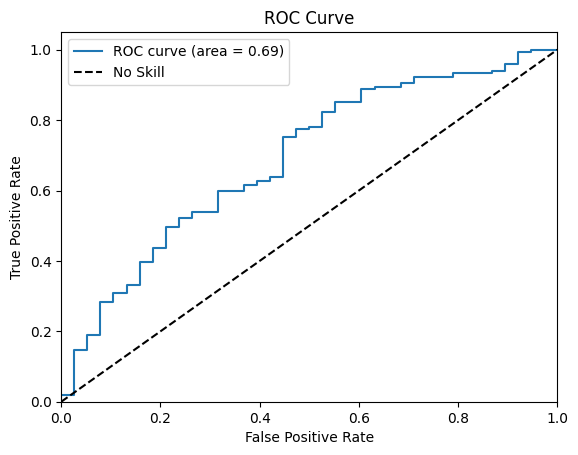

In [ ]:
outputs_swin_c_d = trainer_swin_clinical.predict(test_ds_dermoscopic)
outputs_swin_c_d.metrics
plot_confusion_matrix(outputs_swin_c_d)
plot_roc_curve(outputs_swin_c_d)

### Testset: Clinical

{'test_loss': 0.4234413206577301, 'test_accuracy': 0.8164251207729468, 'test_precision': 0.8258706467661692, 'test_recall': 0.9822485207100592, 'test_f1': 0.8972972972972973, 'test_runtime': 7.7101, 'test_samples_per_second': 26.848, 'test_steps_per_second': 0.519}


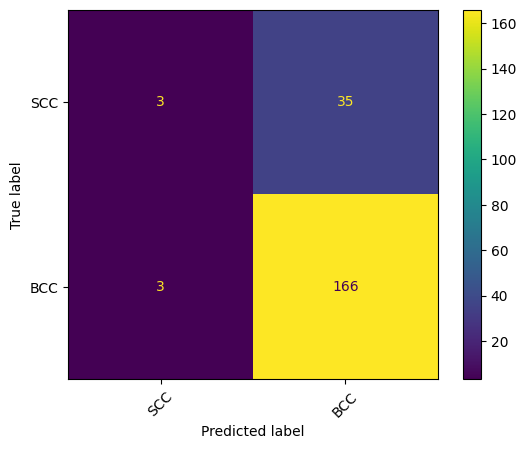

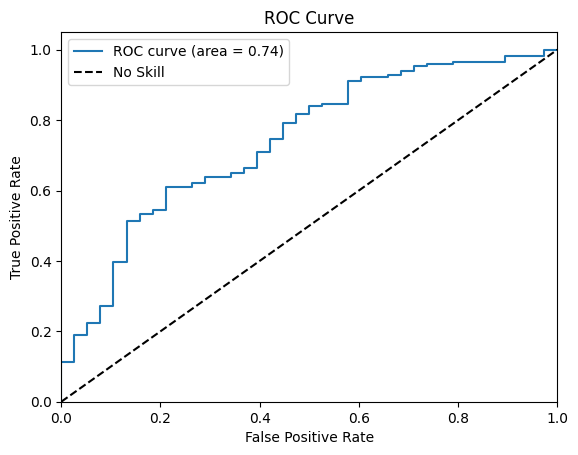

In [ ]:
outputs_swin_c_c = trainer_swin_clinical.predict(test_ds_clinical)
print(outputs_swin_c_c.metrics)
plot_confusion_matrix(outputs_swin_c_c)
plot_roc_curve(outputs_swin_c_c)

### Testset: Mixed

{'test_loss': 0.42433425784111023, 'test_accuracy': 0.8115942028985508, 'test_precision': 0.8186274509803921, 'test_recall': 0.9881656804733728, 'test_f1': 0.8954423592493298, 'test_runtime': 6.1794, 'test_samples_per_second': 33.498, 'test_steps_per_second': 0.647}


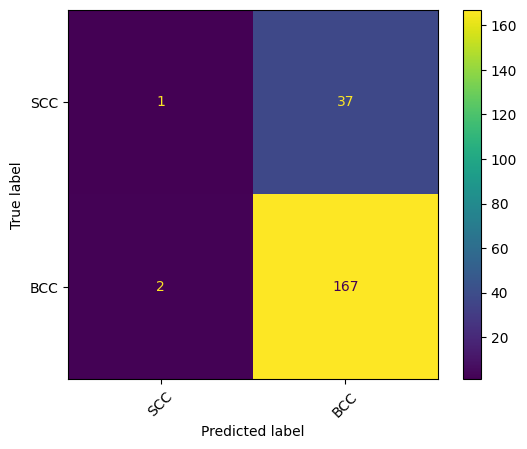

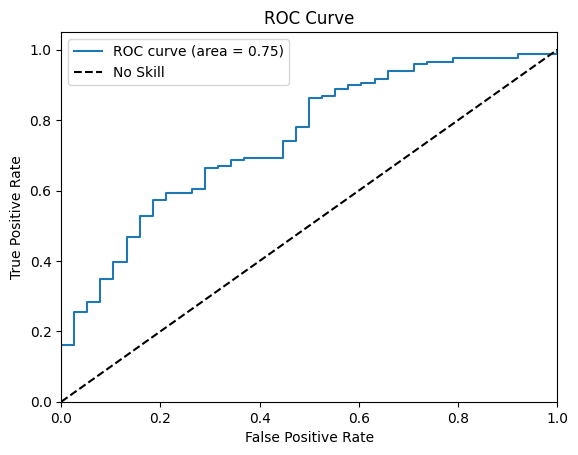

In [ ]:
outputs_swin_c_m = trainer_swin_clinical.predict(test_ds_mixed)
print(outputs_swin_c_m.metrics)
plot_confusion_matrix(outputs_swin_c_m)
plot_roc_curve(outputs_swin_c_m)

In [ ]:
shutil.rmtree('/content/swinv2_base_window8_256.ms_in1k-finetuned')

# Training: Swin (Mixed)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/swinv2_base_window8_256.ms_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

{'input_size': (3, 256, 256),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.5
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/swinv2_base_window8_256.ms_in1k and are newly initialized because the shapes did not match:
- timm_model.head.fc.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.fc.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Mixed

In [ ]:
from datasets import Dataset
from PIL import Image
from datasets import Features, ClassLabel, Image as ImageFeature

#Training Sets - Will be later split into train and val set
df_dermoscopic = df_train_dermoscopic.copy()
df_dermoscopic = df_dermoscopic.rename(columns={'image_path': 'image'})
df_dermoscopic['label'] = df_dermoscopic['label'].apply(lambda x: 1 if x == 'BCC' else 0)

df_clinical = df_train_clinical.copy()
df_clinical = df_clinical.rename(columns={'image_path': 'image'})
df_clinical['label'] = df_clinical['label'].apply(lambda x: 1 if x == 'BCC' else 0)

df_mixed = df_train_mixed.copy()
df_mixed = df_mixed.rename(columns={'image_path': 'image'})
df_mixed['label'] = df_mixed['label'].apply(lambda x: 1 if x == 'BCC' else 0)

#Test Sets
df_dermoscopic_test = df_test_dermoscopic.copy()
df_dermoscopic_test = df_dermoscopic_test.rename(columns={'image_path': 'image'})
df_dermoscopic_test['label'] = df_dermoscopic_test['label'].apply(lambda x: 1 if x == 'BCC' else 0)

df_clinical_test = df_test_clinical.copy()
df_clinical_test = df_clinical_test.rename(columns={'image_path': 'image'})
df_clinical_test['label'] = df_clinical_test['label'].apply(lambda x: 1 if x == 'BCC' else 0)

df_mixed_test = df_test_mixed.copy()
df_mixed_test = df_mixed_test.rename(columns={'image_path': 'image'})
df_mixed_test['label'] = df_mixed_test['label'].apply(lambda x: 1 if x == 'BCC' else 0)

ds_dermoscopic_train = Dataset.from_pandas(df_dermoscopic)
ds_clinical_train = Dataset.from_pandas(df_clinical)
ds_mixed_train = Dataset.from_pandas(df_mixed)

ds_dermoscopic_test = Dataset.from_pandas(df_dermoscopic_test)
ds_clinical_test = Dataset.from_pandas(df_clinical_test)
ds_mixed_test = Dataset.from_pandas(df_mixed_test)

# Cast columns as features
ds_dermoscopic_train = ds_dermoscopic_train.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_dermoscopic_train = ds_dermoscopic_train.cast_column("image", ImageFeature())

ds_clinical_train = ds_clinical_train.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_clinical_train = ds_clinical_train.cast_column("image", ImageFeature())

ds_mixed_train = ds_mixed_train.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_mixed_train = ds_mixed_train.cast_column("image", ImageFeature())

ds_dermoscopic_test = ds_dermoscopic_test.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_dermoscopic_test = ds_dermoscopic_test.cast_column("image", ImageFeature())

ds_clinical_test = ds_clinical_test.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_clinical_test = ds_clinical_test.cast_column("image", ImageFeature())

ds_mixed_test = ds_mixed_test.cast_column("label", ClassLabel(num_classes=2, names=['SCC', 'BCC']))
ds_mixed_test = ds_mixed_test.cast_column("image", ImageFeature())

Casting the dataset:   0%|          | 0/830 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/830 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/830 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/207 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/207 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/207 [00:00<?, ? examples/s]

In [ ]:
train_dataset = train_ds_mixed
eval_dataset = val_ds_mixed

trainer_swin_mixed = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_swin_mixed.train()

TrainOutput(global_step=96, training_loss=0.29529191243151826, metrics={'train_runtime': 944.6436, 'train_samples_per_second': 39.539, 'train_steps_per_second': 0.318, 'total_flos': 1.225158100764328e+18, 'train_loss': 0.29529191243151826, 'epoch': 16.0})

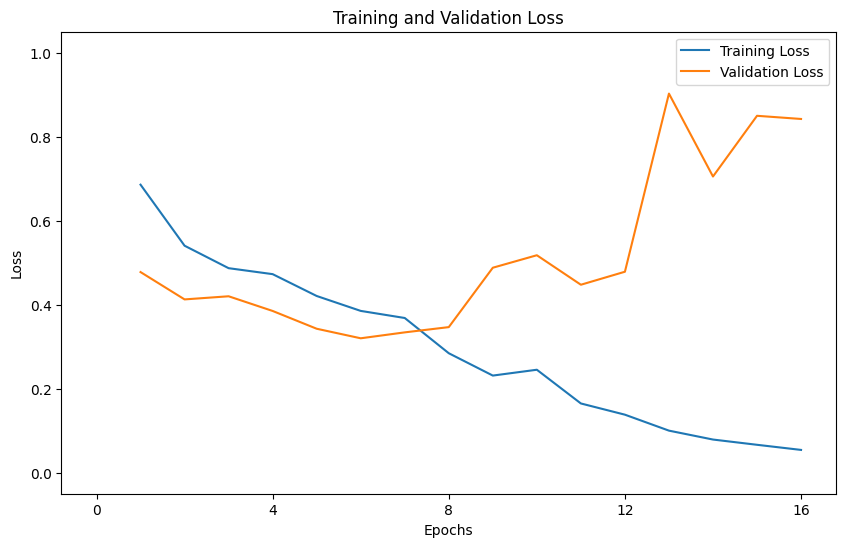

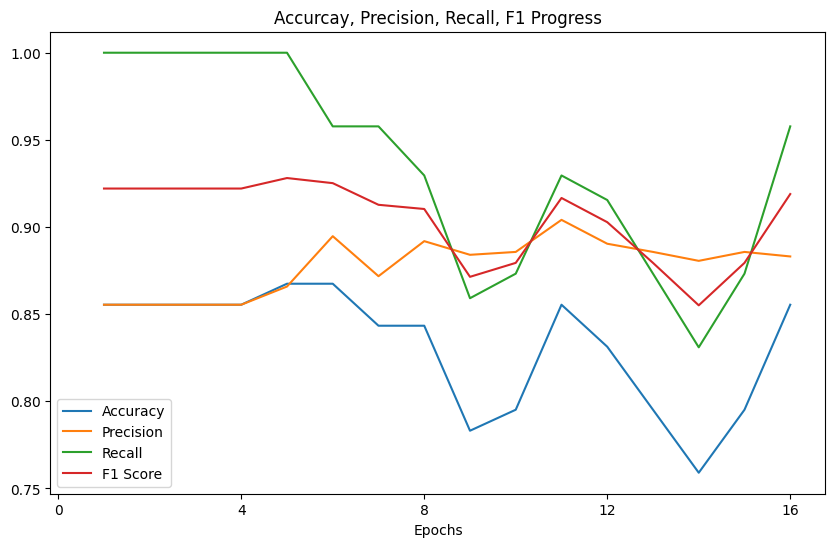

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_swin_mixed.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.33667075634002686, 'test_accuracy': 0.8405797101449275, 'test_precision': 0.8777777777777778, 'test_recall': 0.9349112426035503, 'test_f1': 0.9054441260744985, 'test_runtime': 3.4063, 'test_samples_per_second': 60.77, 'test_steps_per_second': 1.174}


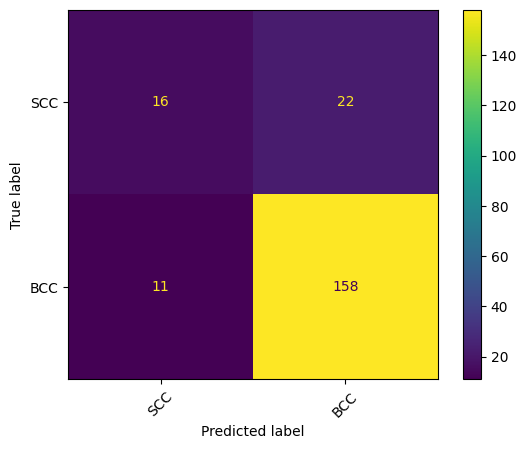

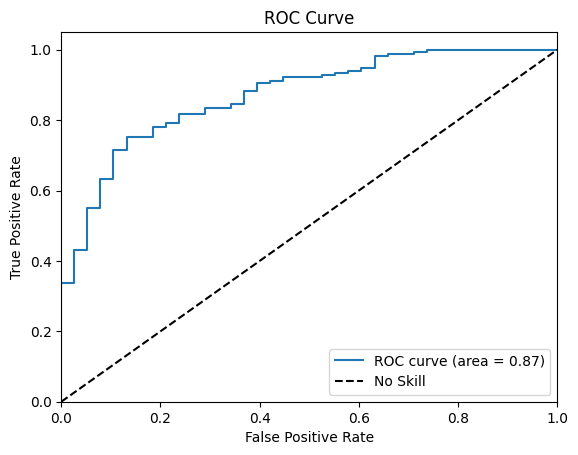

{'test_loss': 0.33667075634002686,
 'test_accuracy': 0.8405797101449275,
 'test_precision': 0.8777777777777778,
 'test_recall': 0.9349112426035503,
 'test_f1': 0.9054441260744985,
 'test_runtime': 3.4063,
 'test_samples_per_second': 60.77,
 'test_steps_per_second': 1.174}

In [ ]:
outputs_swin_m_d = trainer_swin_mixed.predict(test_ds_dermoscopic)
print(outputs_swin_m_d.metrics)
plot_confusion_matrix(outputs_swin_m_d)
plot_roc_curve(outputs_swin_m_d)
outputs_swin_m_d.metrics

### Testset: Clinical

{'test_loss': 0.4936322867870331, 'test_accuracy': 0.8260869565217391, 'test_precision': 0.824390243902439, 'test_recall': 1.0, 'test_f1': 0.9037433155080213, 'test_runtime': 7.7418, 'test_samples_per_second': 26.738, 'test_steps_per_second': 0.517}


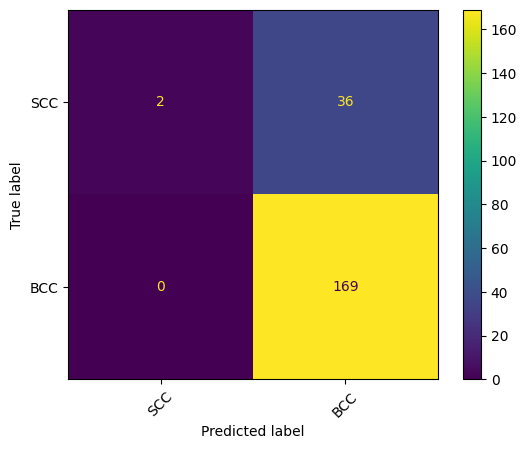

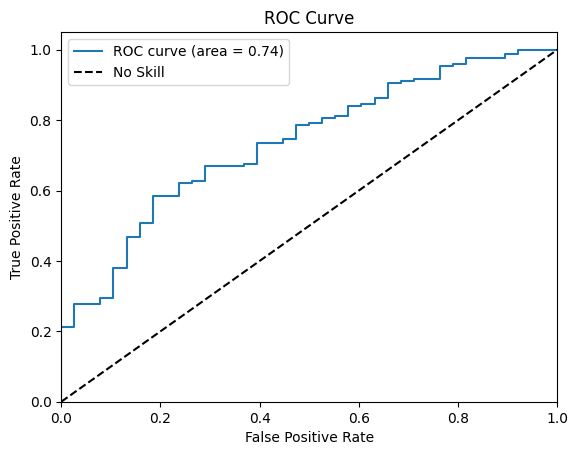

{'test_loss': 0.4936322867870331,
 'test_accuracy': 0.8260869565217391,
 'test_precision': 0.824390243902439,
 'test_recall': 1.0,
 'test_f1': 0.9037433155080213,
 'test_runtime': 7.7418,
 'test_samples_per_second': 26.738,
 'test_steps_per_second': 0.517}

In [ ]:
outputs_swin_m_c = trainer_swin_mixed.predict(test_ds_clinical)
print(outputs_swin_m_c.metrics)
plot_confusion_matrix(outputs_swin_m_c)
plot_roc_curve(outputs_swin_m_c)
outputs_swin_m_c.metrics

### Testset: Mixed

{'test_loss': 0.40310612320899963, 'test_accuracy': 0.8454106280193237, 'test_precision': 0.8549222797927462, 'test_recall': 0.9763313609467456, 'test_f1': 0.9116022099447514, 'test_runtime': 6.2369, 'test_samples_per_second': 33.189, 'test_steps_per_second': 0.641}


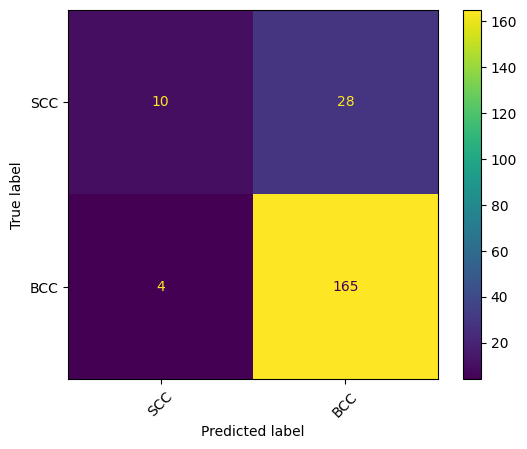

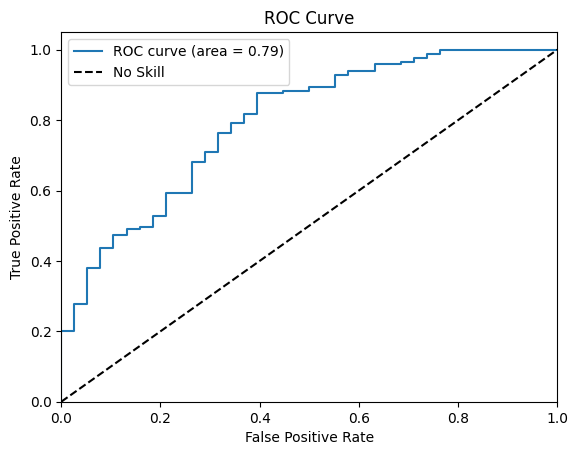

{'test_loss': 0.40310612320899963,
 'test_accuracy': 0.8454106280193237,
 'test_precision': 0.8549222797927462,
 'test_recall': 0.9763313609467456,
 'test_f1': 0.9116022099447514,
 'test_runtime': 6.2369,
 'test_samples_per_second': 33.189,
 'test_steps_per_second': 0.641}

In [ ]:
outputs_swin_m_m = trainer_swin_mixed.predict(test_ds_mixed)
print(outputs_swin_m_m.metrics)
plot_confusion_matrix(outputs_swin_m_m)
plot_roc_curve(outputs_swin_m_m)
outputs_swin_m_m.metrics

In [ ]:
shutil.rmtree('/content/swinv2_base_window8_256.ms_in1k-finetuned')

#Training: DeiT (Dermoscopic)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/deit3_base_patch16_224.fb_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

config.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/deit3_base_patch16_224.fb_in1k and are newly initialized because the shapes did not match:
- timm_model.head.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Dermoscopic

In [ ]:
train_dataset = train_ds_dermoscopic
eval_dataset = val_ds_dermoscopic

trainer_deit_dermoscopic = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_deit_dermoscopic.train()

TrainOutput(global_step=84, training_loss=0.2103395742319879, metrics={'train_runtime': 602.3395, 'train_samples_per_second': 62.008, 'train_steps_per_second': 0.498, 'total_flos': 8.10578069715198e+17, 'train_loss': 0.2103395742319879, 'epoch': 14.0})

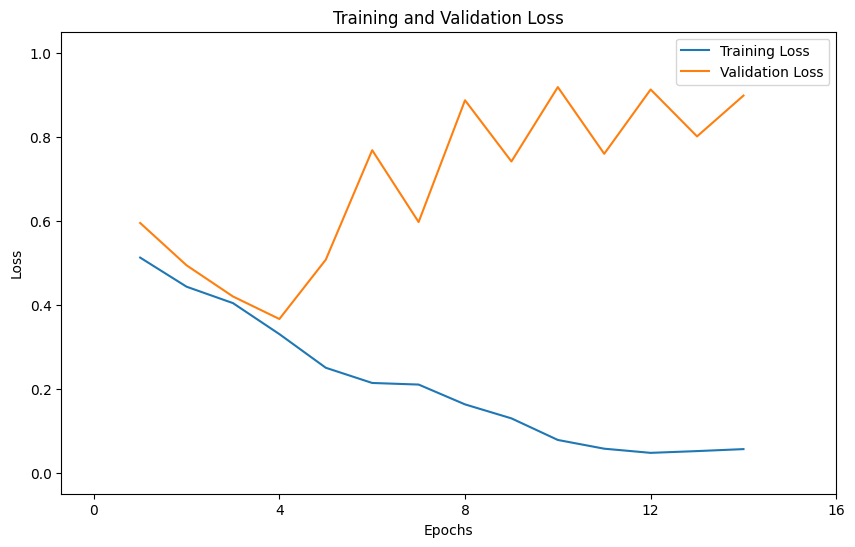

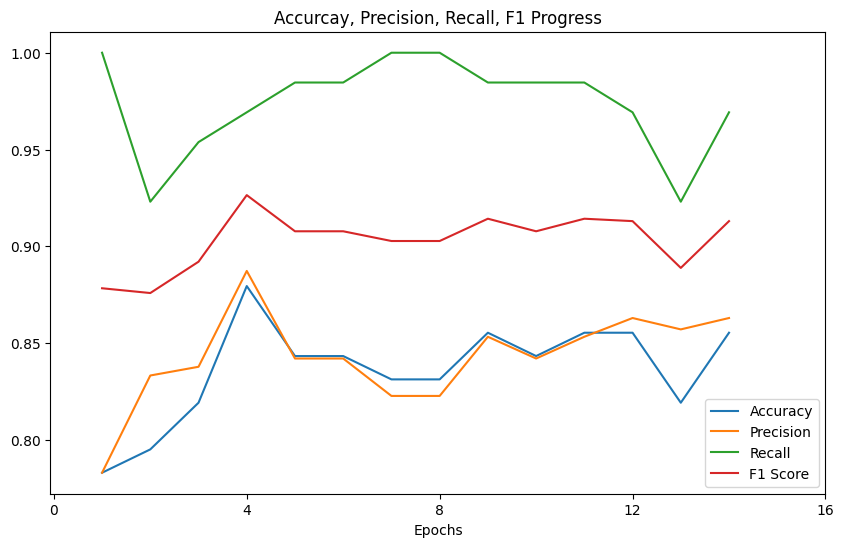

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_deit_dermoscopic.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.31854382157325745, 'test_accuracy': 0.8840579710144928, 'test_precision': 0.9289940828402367, 'test_recall': 0.9289940828402367, 'test_f1': 0.9289940828402367, 'test_runtime': 3.0647, 'test_samples_per_second': 67.543, 'test_steps_per_second': 1.305}


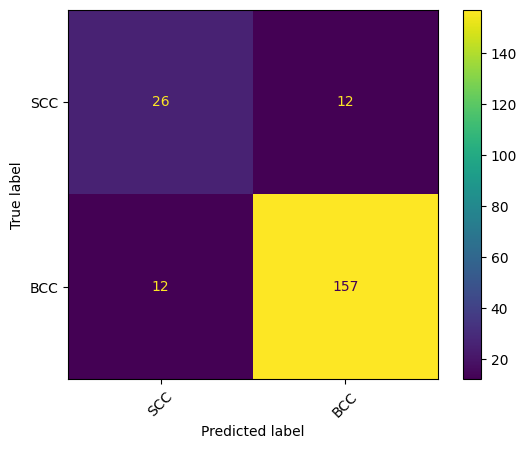

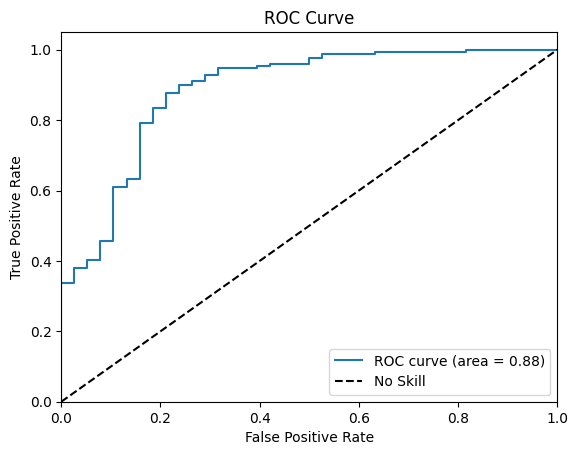

In [ ]:
outputs_deit_d_d = trainer_deit_dermoscopic.predict(test_ds_dermoscopic)
print(outputs_deit_d_d.metrics)
plot_confusion_matrix(outputs_deit_d_d)
plot_roc_curve(outputs_deit_d_d)

### Testset: Clinical

{'test_loss': 0.48731058835983276, 'test_accuracy': 0.7922705314009661, 'test_precision': 0.815, 'test_recall': 0.9644970414201184, 'test_f1': 0.8834688346883469, 'test_runtime': 7.4175, 'test_samples_per_second': 27.907, 'test_steps_per_second': 0.539}


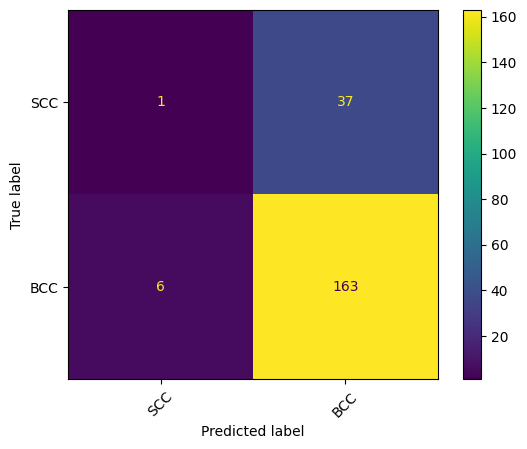

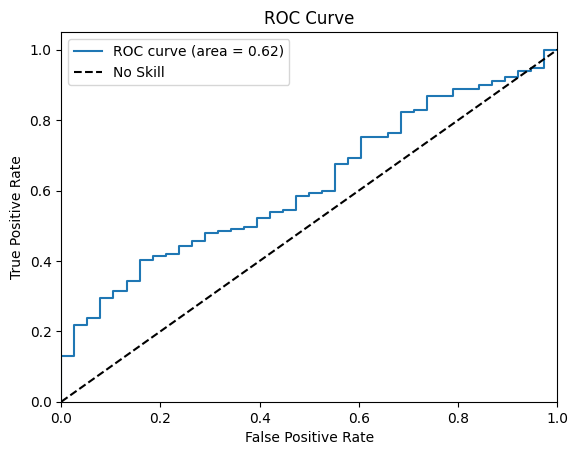

In [ ]:
outputs_deit_d_c = trainer_deit_dermoscopic.predict(test_ds_clinical)
print(outputs_deit_d_c.metrics)
plot_confusion_matrix(outputs_deit_d_c)
plot_roc_curve(outputs_deit_d_c)

### Testset: Mixed

{'test_loss': 0.39347362518310547, 'test_accuracy': 0.8454106280193237, 'test_precision': 0.8702702702702703, 'test_recall': 0.9526627218934911, 'test_f1': 0.9096045197740112, 'test_runtime': 5.9151, 'test_samples_per_second': 34.995, 'test_steps_per_second': 0.676}


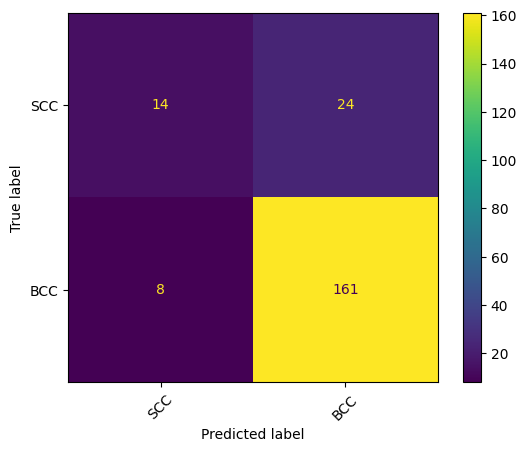

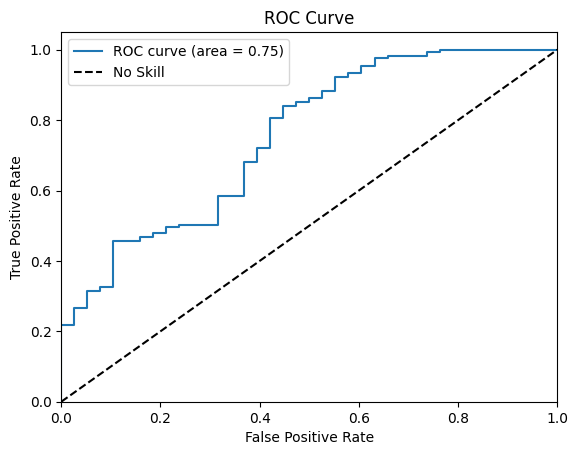

In [ ]:
outputs_deit_d_m = trainer_deit_dermoscopic.predict(test_ds_mixed)
print(outputs_deit_d_m.metrics)
plot_confusion_matrix(outputs_deit_d_m)
plot_roc_curve(outputs_deit_d_m)

In [ ]:
shutil.rmtree('/content/deit3_base_patch16_224.fb_in1k-finetuned')

# Training: DeiT (Clinical)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/deit3_base_patch16_224.fb_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/deit3_base_patch16_224.fb_in1k and are newly initialized because the shapes did not match:
- timm_model.head.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Clinical

In [ ]:
train_dataset = train_ds_clinical
eval_dataset = val_ds_clinical

trainer_deit_clinical = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_deit_clinical.train()

TrainOutput(global_step=138, training_loss=0.19374495463958685, metrics={'train_runtime': 1499.7719, 'train_samples_per_second': 24.904, 'train_steps_per_second': 0.2, 'total_flos': 1.331663971674968e+18, 'train_loss': 0.19374495463958685, 'epoch': 23.0})

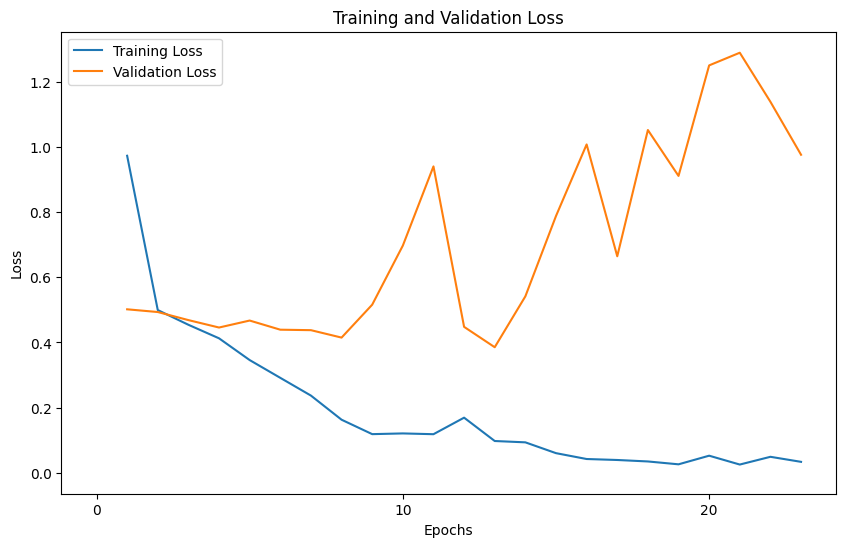

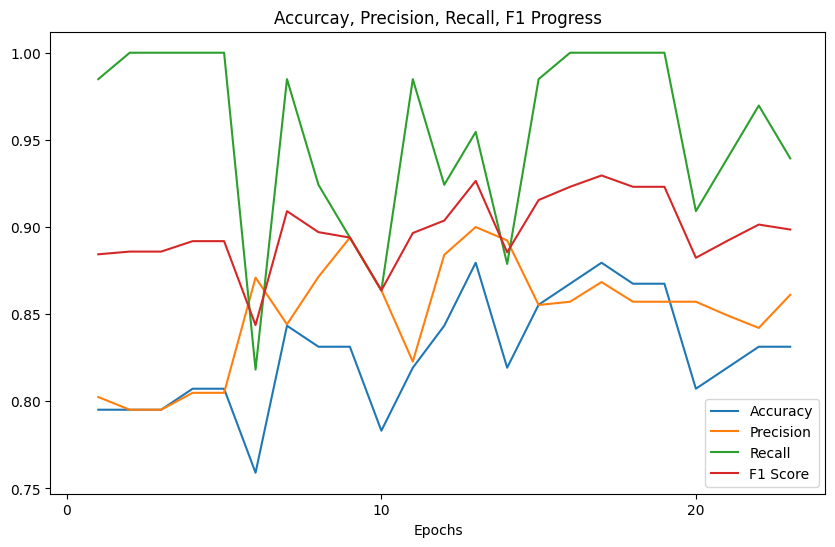

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_deit_clinical.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.6218441724777222, 'test_accuracy': 0.6908212560386473, 'test_precision': 0.847682119205298, 'test_recall': 0.757396449704142, 'test_f1': 0.8, 'test_runtime': 3.0506, 'test_samples_per_second': 67.855, 'test_steps_per_second': 1.311}


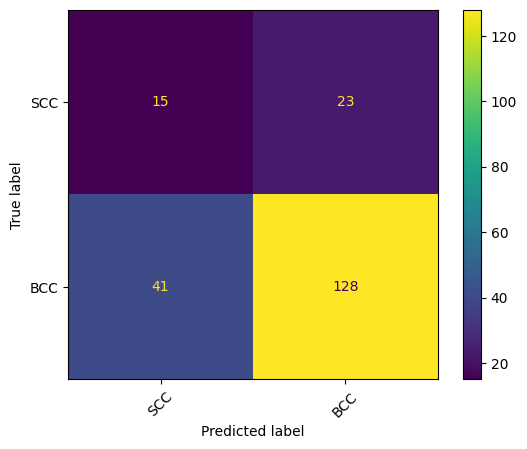

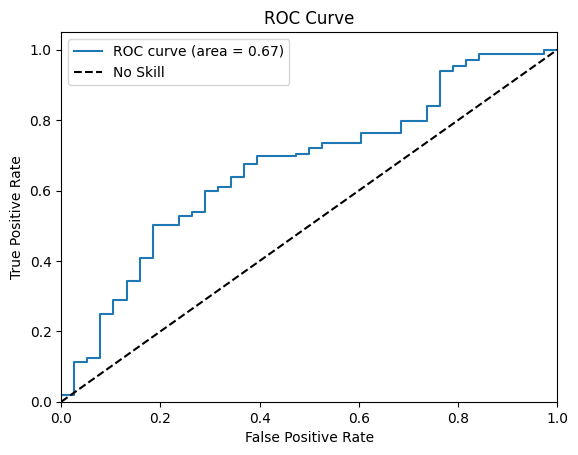

{'test_loss': 0.6218441724777222,
 'test_accuracy': 0.6908212560386473,
 'test_precision': 0.847682119205298,
 'test_recall': 0.757396449704142,
 'test_f1': 0.8,
 'test_runtime': 3.0506,
 'test_samples_per_second': 67.855,
 'test_steps_per_second': 1.311}

In [ ]:
outputs_deit_c_d = trainer_deit_clinical.predict(test_ds_dermoscopic)
print(outputs_deit_c_d.metrics)
plot_confusion_matrix(outputs_deit_c_d)
plot_roc_curve(outputs_deit_c_d)
outputs_deit_c_d.metrics

### Testset: Clinical

{'test_loss': 0.7259546518325806, 'test_accuracy': 0.7874396135265701, 'test_precision': 0.8654970760233918, 'test_recall': 0.8757396449704142, 'test_f1': 0.8705882352941177, 'test_runtime': 7.5385, 'test_samples_per_second': 27.459, 'test_steps_per_second': 0.531}


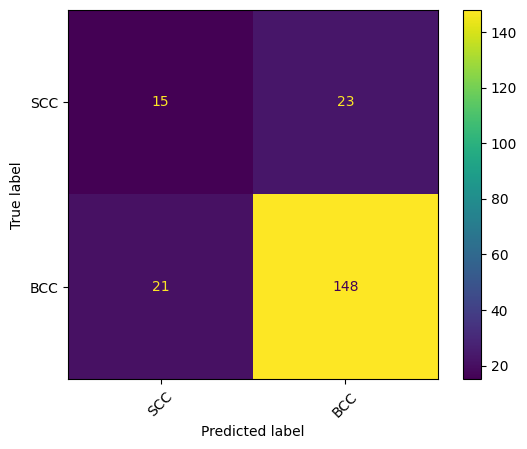

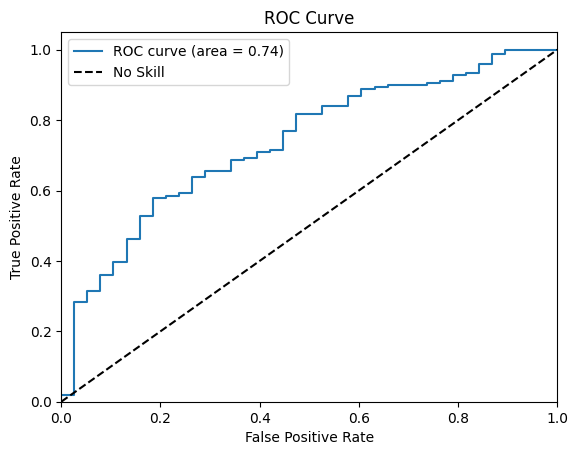

{'test_loss': 0.7259546518325806,
 'test_accuracy': 0.7874396135265701,
 'test_precision': 0.8654970760233918,
 'test_recall': 0.8757396449704142,
 'test_f1': 0.8705882352941177,
 'test_runtime': 7.5385,
 'test_samples_per_second': 27.459,
 'test_steps_per_second': 0.531}

In [ ]:
outputs_deit_c_c = trainer_deit_clinical.predict(test_ds_clinical)
print(outputs_deit_c_c.metrics)
plot_confusion_matrix(outputs_deit_c_c)
plot_roc_curve(outputs_deit_c_c)
outputs_deit_c_c.metrics

### Testset: Mixed

{'test_loss': 0.6046954393386841, 'test_accuracy': 0.7777777777777778, 'test_precision': 0.8727272727272727, 'test_recall': 0.8520710059171598, 'test_f1': 0.8622754491017964, 'test_runtime': 5.8806, 'test_samples_per_second': 35.201, 'test_steps_per_second': 0.68}


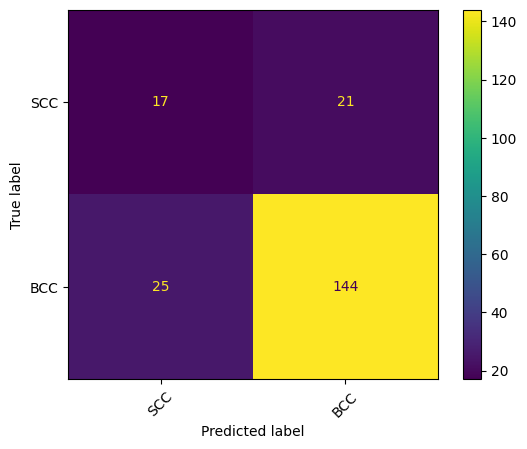

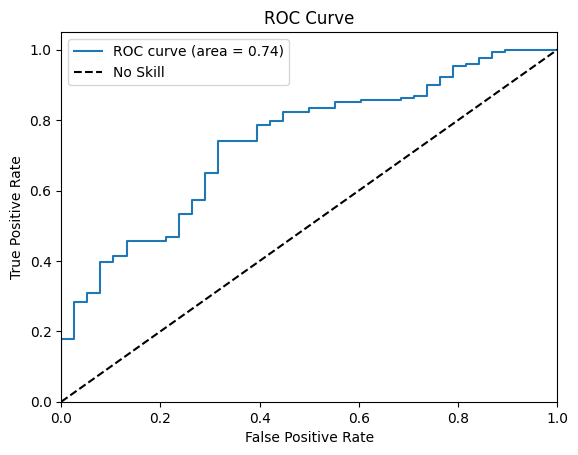

{'test_loss': 0.6046954393386841,
 'test_accuracy': 0.7777777777777778,
 'test_precision': 0.8727272727272727,
 'test_recall': 0.8520710059171598,
 'test_f1': 0.8622754491017964,
 'test_runtime': 5.8806,
 'test_samples_per_second': 35.201,
 'test_steps_per_second': 0.68}

In [ ]:
outputs_deit_c_m = trainer_deit_clinical.predict(test_ds_mixed)
print(outputs_deit_c_m.metrics)
plot_confusion_matrix(outputs_deit_c_m)
plot_roc_curve(outputs_deit_c_m)
outputs_deit_c_m.metrics

In [ ]:
shutil.rmtree('/content/deit3_base_patch16_224.fb_in1k-finetuned')

# Training: DeiT (Mixed)

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

model_checkpoint = "timm/deit3_base_patch16_224.fb_in1k"

image_processor = AutoImageProcessor.from_pretrained(model_checkpoint)
image_processor = image_processor.data_config
image_processor

{'input_size': (3, 224, 224),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.9,
 'crop_mode': 'center'}

In [ ]:
import cv2
import albumentations as A
import numpy as np

train_transforms = A.Compose([
      # Geometric Transforms
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.3),
    A.ShiftScaleRotate(
        shift_limit=0.05, scale_limit=0.05, rotate_limit=10,
        border_mode=cv2.BORDER_REFLECT_101, p=0.4
    ),

    # Photometric Adjustments
    A.RandomBrightnessContrast(
        brightness_limit=0.2, contrast_limit=0.4, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=10, sat_shift_limit=30, val_shift_limit=30, p=0.4
    ),

    # Slight blur for optical variance
    A.OneOf([
        A.GaussianBlur(blur_limit=3, p=0.5),
        A.MedianBlur(blur_limit=3, p=0.5),
    ], p=0.3),

    # Minor elastic distortion to simulate skin curvature
    A.OneOf([
        A.ElasticTransform(alpha=0.5, sigma=20, p=0.5),
        A.GridDistortion(num_steps=5, distort_limit=0.5, p=0.5),
    ], p=0.3),

    # Slight shadow/illumination simulation
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_limit=(1, 3), shadow_dimension=3, shadow_intensity_range=(0.05, 0.1), p=0.2),
    A.RandomSunFlare(src_radius=2, flare_roi=(0, 0, 0.2, 0.2), num_flare_circles_range=(1, 2), p=0.2),

    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

val_transforms = A.Compose([
    A.Resize(height=image_processor['input_size'][1], width=image_processor['input_size'][2]),
    A.Normalize(
        mean=(image_processor['mean'][0], image_processor['mean'][1], image_processor['mean'][2]),
        std=(image_processor['std'][0], image_processor['std'][1], image_processor['std'][2]),
        p=1.0
    ),
])

def preprocess_train(examples):
    examples["pixel_values"] = [
        #train_transforms(image=np.array(image))["image"] for image in examples["image"]
        train_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

def preprocess_val(examples):
    examples["pixel_values"] = [
        #val_transforms(image=np.array(image))["image"] for image in examples["image"]
        val_transforms(image=np.array(img.convert("RGB")))["image"] for img in examples["image"]
    ]

    return examples

# split up training into training + validation
splits = ds_dermoscopic_train.train_test_split(test_size=0.1)
train_ds_dermoscopic = splits['train']
val_ds_dermoscopic = splits['test']

splits = ds_clinical_train.train_test_split(test_size=0.1)
train_ds_clinical = splits['train']
val_ds_clinical = splits['test']

splits = ds_mixed_train.train_test_split(test_size=0.1)
train_ds_mixed = splits['train']
val_ds_mixed = splits['test']

test_ds_dermoscopic = ds_dermoscopic_test
test_ds_clinical = ds_clinical_test
test_ds_mixed = ds_mixed_test

train_ds_dermoscopic.set_transform(preprocess_train)
val_ds_dermoscopic.set_transform(preprocess_val)
test_ds_dermoscopic.set_transform(preprocess_val)

train_ds_clinical.set_transform(preprocess_train)
val_ds_clinical.set_transform(preprocess_val)
test_ds_clinical.set_transform(preprocess_val)

train_ds_mixed.set_transform(preprocess_train)
val_ds_mixed.set_transform(preprocess_val)
test_ds_mixed.set_transform(preprocess_val)

/usr/local/lib/python3.12/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True
)

Some weights of TimmWrapperForImageClassification were not initialized from the model checkpoint at timm/deit3_base_patch16_224.fb_in1k and are newly initialized because the shapes did not match:
- timm_model.head.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- timm_model.head.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np
import torch
from transformers import DefaultDataCollator
import evaluate
from transformers import EarlyStoppingCallback

metric1 = evaluate.load("accuracy")
metric2 = evaluate.load("precision")
metric3 = evaluate.load("recall")
metric4 = evaluate.load("f1")
metric5 = evaluate.load("roc_auc")

def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)

    accuracy = metric1.compute(predictions=predictions, references=eval_pred.label_ids)["accuracy"]
    precision = metric2.compute(predictions=predictions, references=eval_pred.label_ids)["precision"]
    recall = metric3.compute(predictions=predictions, references=eval_pred.label_ids)["recall"]
    f1 = metric4.compute(predictions=predictions, references=eval_pred.label_ids)["f1"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

model_name = model_checkpoint.split("/")[-1]
output_dir = f"{model_name}-finetuned"

learning_rate = 1e-4
batch_size = 64
num_epochs = 50

def collate_fn(examples):
    images = []
    labels = []
    for example in examples:
        image = np.moveaxis(example["pixel_values"], source=2, destination=0)
        images.append(torch.from_numpy(image))
        labels.append(example["label"])

    pixel_values = torch.stack(images)
    labels = torch.tensor(labels)
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

classweight = compute_class_weight(class_weight="balanced", classes=np.unique(labeldict), y=labeldict)
classweight = torch.tensor(classweight, dtype=torch.float)

training_args = TrainingArguments(
    output_dir=output_dir,
    remove_unused_columns=False,
    eval_strategy = "epoch",
    save_strategy = "epoch",
    logging_strategy = "epoch",
    learning_rate=learning_rate,
    lr_scheduler_type = "cosine_with_restarts", #cosine_with_restarts cosine
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    warmup_ratio=0.1,
    logging_steps=1,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    push_to_hub=False,
    report_to="none",
)

class CustomTrainer(Trainer):
    def compute_loss_func(self, model, inputs, num_items_in_batch=None, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss
        loss_fct = nn.BCELoss(weight=classweight)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# Trainset: Mixed

In [ ]:
train_dataset = train_ds_mixed
eval_dataset = val_ds_mixed

trainer_deit_mixed = CustomTrainer(
    model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
    callbacks=[EarlyStoppingCallback(10)],
)

trainer_deit_mixed.train()

TrainOutput(global_step=84, training_loss=0.225523822364353, metrics={'train_runtime': 776.5548, 'train_samples_per_second': 48.097, 'train_steps_per_second': 0.386, 'total_flos': 8.10578069715198e+17, 'train_loss': 0.225523822364353, 'epoch': 14.0})

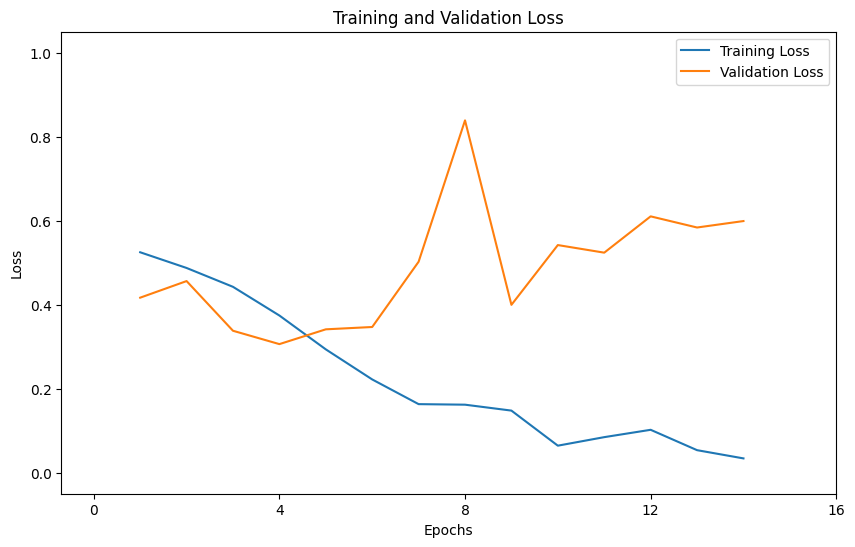

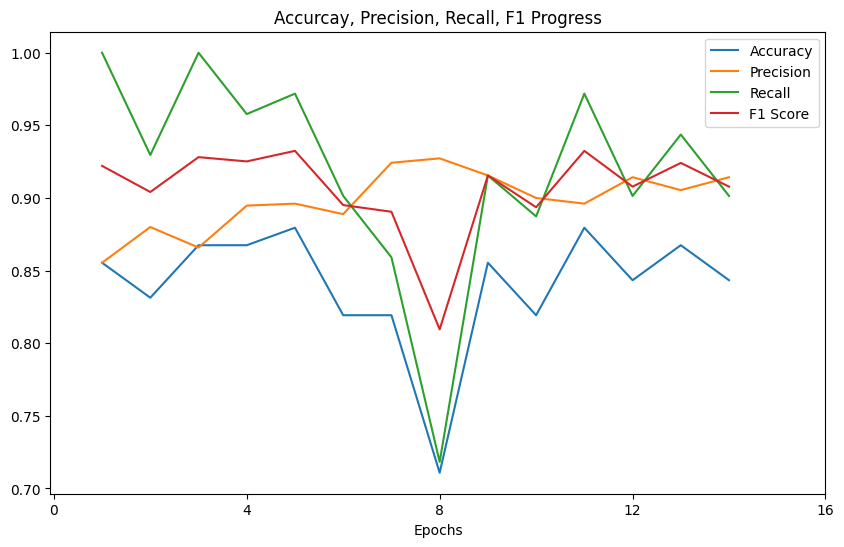

In [ ]:
from pandas import DataFrame

df = pd.DataFrame(trainer_deit_mixed.state.log_history)
df_history = pd.concat([df['loss'][df['loss'] > 0].reset_index(drop=True), df['eval_loss'][df['eval_loss'] > 0].reset_index(drop=True), df['eval_accuracy'][df['eval_accuracy'] > 0].reset_index(drop=True), df['eval_precision'][df['eval_precision'] > 0].reset_index(drop=True), df['eval_recall'][df['eval_recall'] > 0].reset_index(drop=True), df['eval_f1'][df['eval_f1'] > 0].reset_index(drop=True)], axis=1, ignore_index=True)
df_history.columns = ['loss', 'eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1']
df_history.index += 1

plot_training_metrics(df_history)

### Testset: Dermoscopic

{'test_loss': 0.3581945300102234, 'test_accuracy': 0.8454106280193237, 'test_precision': 0.8512820512820513, 'test_recall': 0.9822485207100592, 'test_f1': 0.9120879120879121, 'test_runtime': 3.054, 'test_samples_per_second': 67.78, 'test_steps_per_second': 1.31}


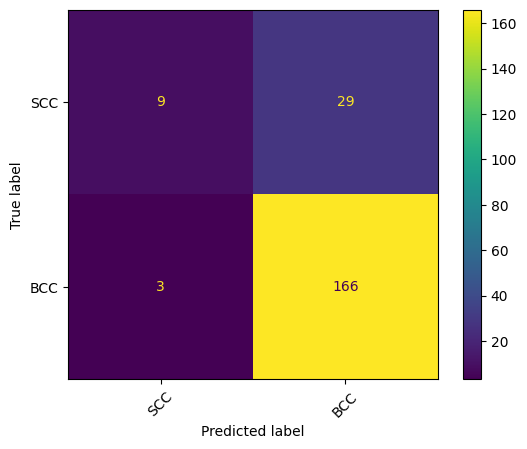

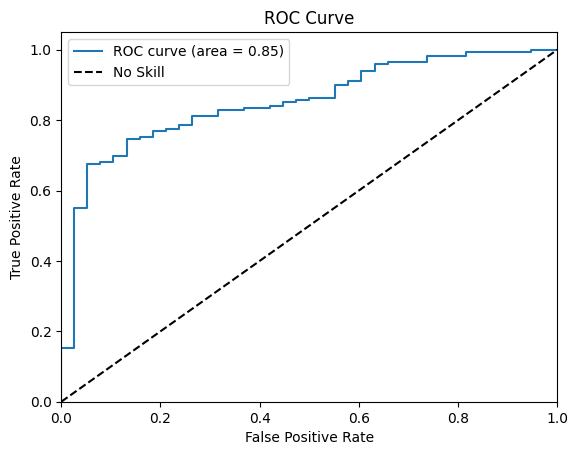

{'test_loss': 0.3581945300102234,
 'test_accuracy': 0.8454106280193237,
 'test_precision': 0.8512820512820513,
 'test_recall': 0.9822485207100592,
 'test_f1': 0.9120879120879121,
 'test_runtime': 3.054,
 'test_samples_per_second': 67.78,
 'test_steps_per_second': 1.31}

In [ ]:
outputs_deit_m_d = trainer_deit_mixed.predict(test_ds_dermoscopic)
print(outputs_deit_m_d.metrics)
plot_confusion_matrix(outputs_deit_m_d)
plot_roc_curve(outputs_deit_m_d)
outputs_deit_m_d.metrics

### Testset: Clinical

{'test_loss': 0.4323001801967621, 'test_accuracy': 0.8260869565217391, 'test_precision': 0.824390243902439, 'test_recall': 1.0, 'test_f1': 0.9037433155080213, 'test_runtime': 7.4345, 'test_samples_per_second': 27.843, 'test_steps_per_second': 0.538}


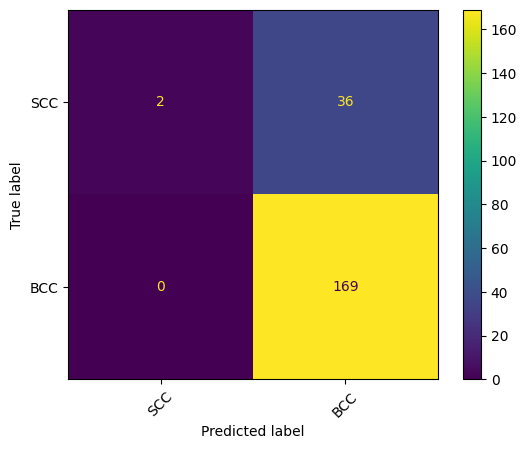

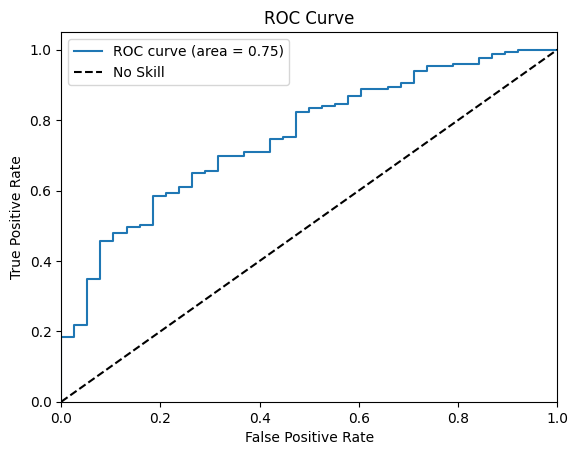

{'test_loss': 0.4323001801967621,
 'test_accuracy': 0.8260869565217391,
 'test_precision': 0.824390243902439,
 'test_recall': 1.0,
 'test_f1': 0.9037433155080213,
 'test_runtime': 7.4345,
 'test_samples_per_second': 27.843,
 'test_steps_per_second': 0.538}

In [ ]:
outputs_deit_m_c = trainer_deit_mixed.predict(test_ds_clinical)
print(outputs_deit_m_c.metrics)
plot_confusion_matrix(outputs_deit_m_c)
plot_roc_curve(outputs_deit_m_c)
outputs_deit_m_c.metrics

### Testset: Mixed

{'test_loss': 0.35085681080818176, 'test_accuracy': 0.8454106280193237, 'test_precision': 0.8407960199004975, 'test_recall': 1.0, 'test_f1': 0.9135135135135135, 'test_runtime': 5.9112, 'test_samples_per_second': 35.018, 'test_steps_per_second': 0.677}


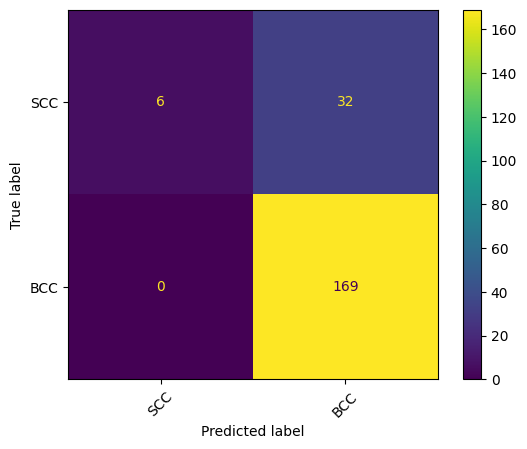

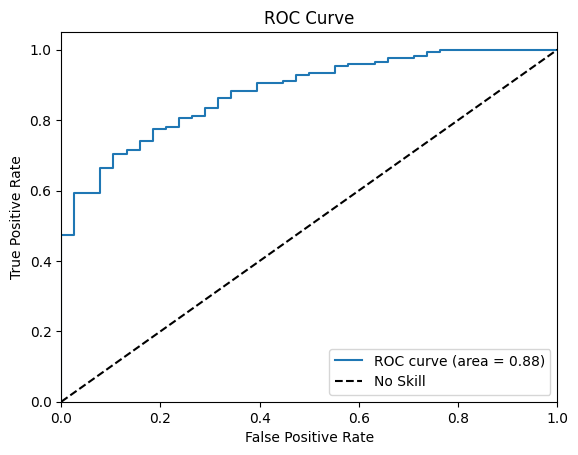

{'test_loss': 0.35085681080818176,
 'test_accuracy': 0.8454106280193237,
 'test_precision': 0.8407960199004975,
 'test_recall': 1.0,
 'test_f1': 0.9135135135135135,
 'test_runtime': 5.9112,
 'test_samples_per_second': 35.018,
 'test_steps_per_second': 0.677}

In [ ]:
outputs_deit_m_m = trainer_deit_mixed.predict(test_ds_mixed)
print(outputs_deit_m_m.metrics)
plot_confusion_matrix(outputs_deit_m_m)
plot_roc_curve(outputs_deit_m_m)
outputs_deit_m_m.metrics

In [ ]:
shutil.rmtree('/content/deit3_base_patch16_224.fb_in1k-finetuned')